**Course: CMPE 297**

**Team:** **Transformers**

**Github Link:**  


https://github.com/AnandMuralidhar/Trasnformers-StockMarketPrediction



**1. Team Members:**


Amrutha Singh Balaji Singh (013778583)




Anand Muralidhara (013752622)




Poorva Agarwal (013770939)




Snehal Yeole (012548471)


**2. Team Contribution**

Machine Learning Cycle:
1. **Configuration of the System** : Iterative, Notebook, code structure, data, where will it reside, folders, cloud buckets etc. **Team**

2. **Data Collection** : initial Data Set   **Team**

3. **Set Data Narrative** : Set Business Objectives, what use case are you solving for  **Team**

4. **Exploratory Data Analysis and Visualization:**
* feature analysis and engineering (for ML, for DL it's feature extraction) **Amrutha**
* Analyze data **Amrutha**
* Visualize data **Anand**
* Run Stats: mean, median, mode, correlation, variance **Snehal**
* correlation **Anand**
* pairplot() **Poorva**
* gini score **Poorva**
* feature_importance with xgboost **Snehal**

5. **Data Prep: Curation**
* Feature Selection and Extraction : what are the main features to use in this data set? **Anand**
* Data Verification: Do we have enough data? **Team**
Possibility of Amalgamation1: Add Dataset 2 **Team**
* Data Cleansing **Amrutha**
* Data Regularization **Poorva**
* Data Normalization **Snehal**

6. **Unsupervised Exploration : Find relevant Clusters in Your Data**
* How many clusters? Explore different k’s… **Poorva**
* Select Clustering algorithms, run several **Team**
* Compare Clustering in a table **Snehal**
* What does each cluster mean? How do they contribute to your Data Narrative (Story) **Amrutha**
* Measure goodness of your clusters (e.g., BICs) **Anand**

7. **Supervised Training Preparation: Data Curation : label your data set** 
* Classify Your Data Sets : Run different classification algorithms **Team**
* Measure Classification Success **Snehal**
* What regression objectives should we have? Complete your , add to your Data Story **Anand**
* Run Regressions using various algorithms  **Team**
* Measure Success of Regressions and **Amrutha**
* Compare Regressions in a table **Poorva**

8. **Metrics and Evaluation**
* F1, R2, RMSE, **Amrutha and Anand**
* Precision, Recall, Accuracy **Poorva and Snehal**
* Confusion Matrix **Team**
* Heat Map **Team**

9. **Distillation** -  **Team**
* Entity Identification 
* Customer Rank 
* Sentiment
* Topic Modeling





# **Step 1. Configuration of the System : Iterative, Notebook, code structure, data, where will it reside, folders, cloud buckets etc.**

The dataset was uploaded to the google drive - https://colab.research.google.com/drive/1WeI2aOPr7YrtmPqozg7ZJDBdkKNnFfJr

The notebook was setup on Goolge Colab. 


# **Step 2. Data Collection : Initial Data Set**

https://fred.stlouisfed.org/series/FEDFUNDS 

https://fred.stlouisfed.org/series/NASDAQCOM

https://fred.stlouisfed.org/series/GDPC1

https://fred.stlouisfed.org/series/UNEMPLOY

**Link of dataset on drive:**

https://drive.google.com/open?id=1qgsOPA2svJ-58u5zurF1NScUPu9ZJSEP

Started with raw dataset and considered NASDAQ, YIELD and UNEMPLOYMENT as the major factors for recession.
[Link of initial dataset]

After performing Kmeans clustering and GMM clustering, we got similar clusters for our data. The clusters were scattered so we thought of adding more columns to the dataset.
We added GDP which is also an important factor to determine the bubble formation.

# **Step 3. Set Data Narrative : Set Business Objectives, what use case are you solving for**

**Business Objective:** The main objective of this project is to predict the bubble formation and next recession based on several factors such as yields on short- and long-term maturity bonds, NASDAQ index and Gross Domestic Product growth rate and Unemployment rate and the inverted yield curve. These factors are the strong indicators in determining the probability of an upcoming recession. 

**Dataset:** We are using dataset with NASDAQ and Yield curve with the difference of 10-year and 2 year treasury notes (The column T10Y2Y in the dataset stands for 10-Year Treasury Constant Maturity and 2-Year Treasury Constant Maturity). The dataset can be found on the common google drive under “transformers-stock-market-prediction” folder.

**Data Interpretation:**	Below is the data interpretation derived after applying unsupervised clustering algorithms on the data set:

**Inverted Yield curve** – The yield on long term investment (10 year) is lower than the yield on short term investment (2 year)

**Real GDP** - Growth rate less than 2% indicates Bubble formation and less than 0% or negative values indicate Recession period.
Max GDP value = 8.57%
Min GDP value = -3.92%
The GDP values goes down when the NASDAQ index is decreased Unemployment level: As the value of NASDAQ composite index decreases, the rate of unemployment increases.



**Mount the shared drive on google colab**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**Import required libraries**

In [0]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pydotplus 

from IPython.display import Image  
from collections import defaultdict
from sklearn.dummy import DummyClassifier
from sklearn import svm, tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2, SelectFromModel
from sklearn.linear_model import LogisticRegression, SGDClassifier
from imblearn.over_sampling import SMOTE

In [0]:
data_gdp_records = pd.read_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/gdp-data.csv", sep=',')
data_gdp_records.head()

,DATE,GDP
0,7/1/1976,5965.265
1,10/1/1976,6008.504
2,1/1/1977,6079.494
3,4/1/1977,6197.686
4,7/1/1977,6309.514


In [0]:
data_records_initial = pd.read_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/nasdaq-unemploy-gdp-yield-quarterly.csv", sep=',', usecols=['DATE','NASDAQ','UNEMPLOY','YIELD'])
data_records_initial.head()

,DATE,NASDAQ,YIELD,UNEMPLOY
0,7/1/1976,91.235625,187.83026,7462.666667
1,10/1/1976,91.274127,250.63286,7531.666667
2,1/1/1977,96.217460,227.54796,7343.333333
3,4/1/1977,96.650317,213.20591,7034.666667
4,7/1/1977,100.756191,139.16403,6835.000000




**Now merge the data set into recession factors data set to see the relation between real gdp and NASDAQ index**


In [0]:
#Get the required columns from GDP dataset
data_gdp_columns_required = data_gdp_records[['GDP']] 

#Get the required columns from recession factors dataset
data_recession_columns_required = data_records_initial[['DATE','NASDAQ','UNEMPLOY','YIELD']]

frames = [data_recession_columns_required, data_gdp_columns_required]
#merged_data = pd.concat(frames, sort=False)

data_records_datset = pd.concat((data_recession_columns_required,data_gdp_columns_required), axis = 1)

data_records_datset

,DATE,NASDAQ,UNEMPLOY,YIELD,GDP
0,7/1/1976,91.235625,7462.666667,187.83026,5965.265
1,10/1/1976,91.274127,7531.666667,250.63286,6008.504
2,1/1/1977,96.217460,7343.333333,227.54796,6079.494
3,4/1/1977,96.650317,7034.666667,213.20591,6197.686
4,7/1/1977,100.756191,6835.000000,139.16403,6309.514
...,...,...,...,...,...
167,4/1/2018,7355.938859,6333.333333,75.76728,18598.135
168,7/1/2018,7874.576365,6142.666667,44.05641,18732.720
169,10/1/2018,7215.114587,6141.333333,40.71279,18783.548
170,1/1/2019,7343.621459,6327.000000,28.67256,18927.281


In [0]:
data_records_recession = pd.read_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/quarterly-nasdaq-gdp-unemp-ind-yield.csv", sep=',', usecols=['DATE','INDUSTRY','RECESSION'])
data_records_recession.head()

,DATE,INDUSTRY,RECESSION
0,10/1/77,3.287300,0
1,1/1/78,2.183100,0
2,4/1/78,2.710667,0
3,7/1/78,2.632567,0
4,10/1/78,3.244300,0


In [0]:
#Get the required columns from GDP dataset
data_gdp_columns_required = data_records_recession[['DATE','INDUSTRY','RECESSION']] 

#Get the required columns from recession factors dataset
data_recession_columns_required1 = data_records_datset[['DATE','NASDAQ','UNEMPLOY','YIELD','GDP']]

frames = [data_recession_columns_required1, data_gdp_columns_required]
#merged_data = pd.concat(frames, sort=False)

data_records = pd.concat((data_recession_columns_required1,data_gdp_columns_required), axis = 1)

data_records

,DATE,NASDAQ,UNEMPLOY,YIELD,GDP,DATE,INDUSTRY,RECESSION
0,7/1/1976,91.235625,7462.666667,187.83026,5965.265,10/1/77,3.287300,0.0
1,10/1/1976,91.274127,7531.666667,250.63286,6008.504,1/1/78,2.183100,0.0
2,1/1/1977,96.217460,7343.333333,227.54796,6079.494,4/1/78,2.710667,0.0
3,4/1/1977,96.650317,7034.666667,213.20591,6197.686,7/1/78,2.632567,0.0
4,7/1/1977,100.756191,6835.000000,139.16403,6309.514,10/1/78,3.244300,0.0
...,...,...,...,...,...,...,...,...
167,4/1/2018,7355.938859,6333.333333,75.76728,18598.135,NaN,NaN,NaN
168,7/1/2018,7874.576365,6142.666667,44.05641,18732.720,NaN,NaN,NaN
169,10/1/2018,7215.114587,6141.333333,40.71279,18783.548,NaN,NaN,NaN
170,1/1/2019,7343.621459,6327.000000,28.67256,18927.281,NaN,NaN,NaN


**Load the data**

In [0]:
data_records = pd.read_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/quarterly-nasdaq-gdp-unemp-ind-yield.csv", sep=',', usecols=['DATE','NASDAQ','UNEMPLOY','YIELD','GDP','INDUSTRY','RECESSION'])
data_records.head()

,DATE,NASDAQ,UNEMPLOY,YIELD,GDP,INDUSTRY,RECESSION
0,10/1/77,101.216508,6654.666667,-69.00365,301.148,3.287300,0
1,1/1/78,102.436452,6381.333333,-64.99132,250.297,2.183100,0
2,4/1/78,117.489531,6111.666667,-74.26246,376.704,2.710667,0
3,7/1/78,130.087143,6171.333333,-97.95441,330.983,2.632567,0
4,10/1/78,119.848413,6084.000000,-211.76856,420.103,3.244300,0


# **Step 4. Exploratory Data Analysis and Visualization**



### **4.1 Feature Analysis and Engineering**

* Initially, We chose 5 features for our project. They are: NASDAQ, Unemployment, Yield, GDP and IndustrialGrowth

* NASDAQ indicates the stock market index. Unemployment indicates the thousands of people in the US who are unemployed. Yield indicates the Federal funds on quarterly basis. GDP shows the Gross Domestic Product for US on a quarterly basis.


### **4.2 Analyze the data**

In [0]:
print('**********Shape of the Dataset.*******************************************')
print(data_records.shape)
print('**********Column names******************************************************')
print(data_records.columns)
print('**********Total number of null values in each column.**********************')
print(data_records.isnull().sum())
print('**********Total number of unique values in each column*********************')
print(data_records.nunique())

**********Shape of the Dataset.*******************************************
(167, 7)
**********Column names******************************************************
Index(['DATE', 'NASDAQ', 'UNEMPLOY', 'YIELD', 'GDP', 'INDUSTRY', 'RECESSION'], dtype='object')
**********Total number of null values in each column.**********************
DATE         0
NASDAQ       0
UNEMPLOY     0
YIELD        0
GDP          0
INDUSTRY     0
RECESSION    0
dtype: int64
**********Total number of unique values in each column*********************
DATE         167
NASDAQ       167
UNEMPLOY     163
YIELD        167
GDP          167
INDUSTRY     167
RECESSION      2
dtype: int64


**Print basic information of the dataset**

In [0]:
data_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 7 columns):
DATE         167 non-null object
NASDAQ       167 non-null float64
UNEMPLOY     167 non-null float64
YIELD        167 non-null float64
GDP          167 non-null float64
INDUSTRY     167 non-null float64
RECESSION    167 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 9.3+ KB


**Explore the label class**

In [0]:
print('Negative recession counts: ', data_records['RECESSION'].value_counts().values[0])
print('Positive recession counts: ', data_records['RECESSION'].value_counts().values[1])

Negative recession counts:  141
Positive recession counts:  26


### **4.3 Visualize the data**

**Import required libraries and define plot functions**

In [0]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt
import seaborn as sns               # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()
from subprocess import check_output

import warnings                                            # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

def annot_plot_num(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))
        
def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
         ax.annotate(f"{p.get_height() * 100 / data_records.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
         textcoords='offset points')

**Plot the bar graph for entire dataset**

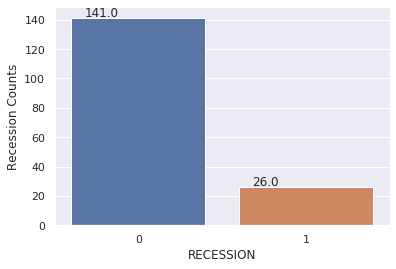

In [0]:
ax = sns.countplot('RECESSION', data = data_records)
plt.ylabel('Recession Counts')
annot_plot_num(ax,0.08,1)
plt.show()

Above bar graph shows the number of positive and negative Recession counts

**Negative Recession Counts** 141 (binary value = 0) -> **No Recession**

**Positive Recession Counts:** 26 (binary value = 1) -> **Recession**



**Box Plot**

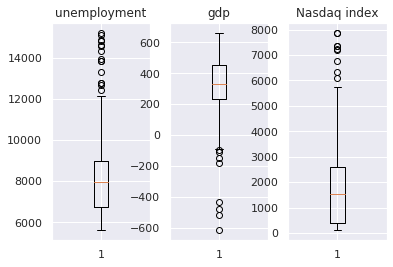

In [0]:
# Boxplots for continuous attributes
fig, axes = plt.subplots(nrows=1, ncols=3)
axes[0].boxplot(data_records['UNEMPLOY'])
axes[0].set_title('unemployment')
axes[1].boxplot(data_records['GDP'])
axes[1].set_title('gdp')
axes[2].boxplot(data_records['NASDAQ'])
axes[2].set_title('Nasdaq index')

fig.savefig("boxplots.png")

Box plot for "UNEMPLOY", "GDP", and "NASDAQ" attributes in the recession dataset

**Violin Plot**

**Distribution of data in the YIELD values**

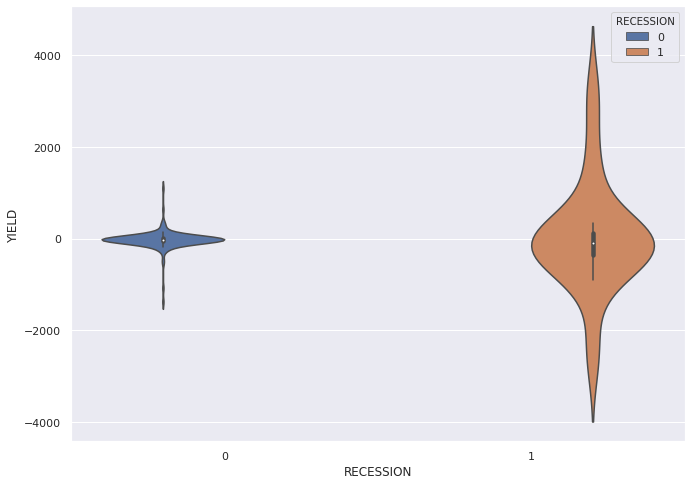

In [0]:
sns.set(rc={'figure.figsize':(11,8)})
sns.violinplot(x="RECESSION",y="YIELD", hue="RECESSION", data=data_records);
plt.show()

In its simplest form, a violin plot displays the distribution of data across labels. In the above plot we have labels ‘0’ and ‘1’ on the x-axis and the values of ‘YIELD’ on the y-axis. The violin plot shows us that the largest distribution of data is in the YIELD values between 0.2 to 0.6, and the rest of the YIELD labels have comparatively less data.

**Distribution of data in the GDP values**

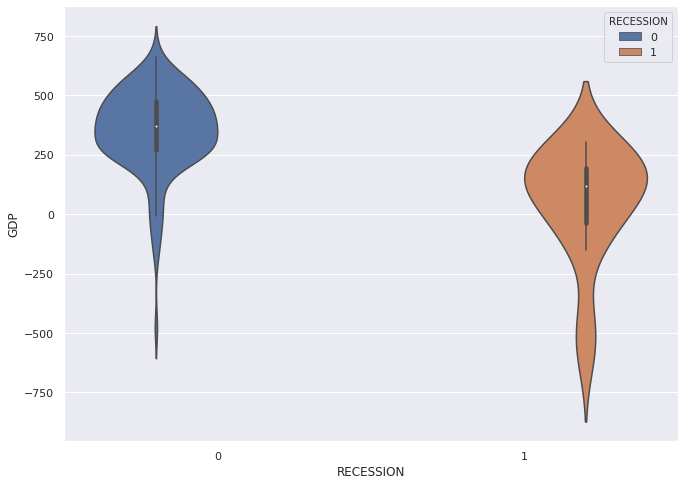

In [0]:
sns.set(rc={'figure.figsize':(11,8)})
sns.violinplot(x="RECESSION",y="GDP", hue="RECESSION", data=data_records);
plt.show()

In its simplest form, a violin plot displays the distribution of data across labels. In the above plot we have labels ‘0’ and ‘1’ on the x-axis and the values of ‘GDP’ on the y-axis. The violin plot shows us that the largest distribution of data is in the GDP values between 0.3 to 1.0, and the rest of the GDP labels have comparatively less data.

**Distribution of data in the UNEMPLOY values**

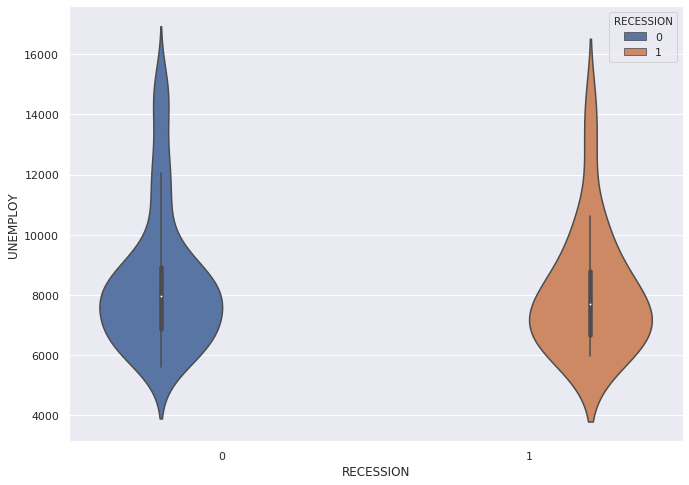

In [0]:
sns.set(rc={'figure.figsize':(11,8)})
sns.violinplot(x="RECESSION",y="UNEMPLOY", hue="RECESSION", data=data_records);
plt.show()

In its simplest form, a violin plot displays the distribution of data across labels. In the above plot we have labels ‘0’ and ‘1’ on the x-axis and the values of ‘UNEMPLOY’ on the y-axis. The violin plot shows us that the largest distribution of data is in the UNEMPLOY values between 4500 to 10,000 and the rest of the UNEMPLOY labels have comparatively less data.

**Distribution of data in the NASDAQ values**

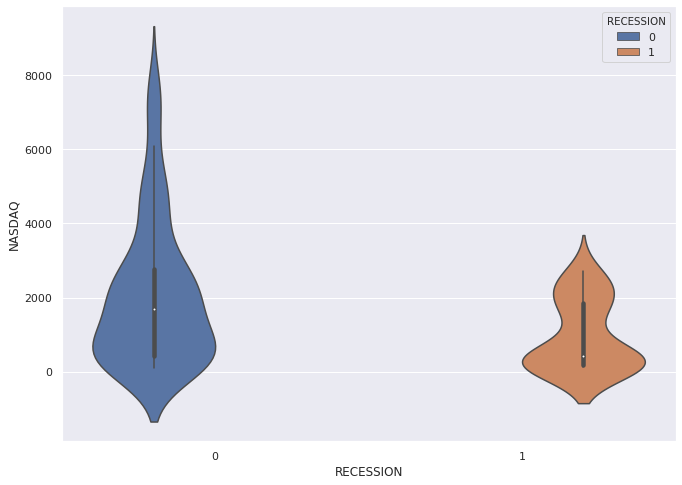

In [0]:
sns.set(rc={'figure.figsize':(11,8)})
sns.violinplot(x="RECESSION",y="NASDAQ", hue="RECESSION", data=data_records);
plt.show()

In its simplest form, a violin plot displays the distribution of data across labels. In the above plot we have labels ‘0’ and ‘1’ on the x-axis and the values of ‘NASDAQ’ on the y-axis. The violin plot shows us that the largest distribution of data is in the NASDAQ values between -5.0 to 5000.0, and the rest of the NASDAQ labels have comparatively less data.

**Distribution of data in the INDUSTRY values**

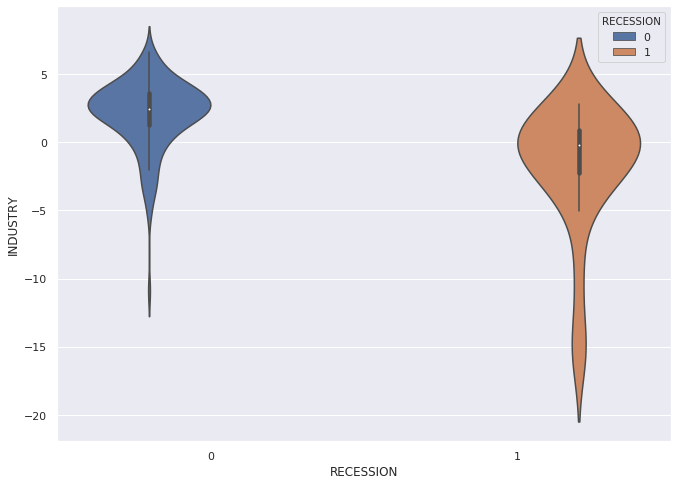

In [0]:
sns.set(rc={'figure.figsize':(11,8)})
sns.violinplot(x="RECESSION",y="INDUSTRY", hue="RECESSION", data=data_records);
plt.show()

In its simplest form, a violin plot displays the distribution of data across labels. In the above plot we have labels ‘0’ and ‘1’ on the x-axis and the values of ‘INDUSTRY’ on the y-axis. The violin plot shows us that the largest distribution of data is in the INDUSTRY values between -5.0 to 5.0, and the rest of the INDUSTRY labels have comparatively less data.

**Distribution Plot**

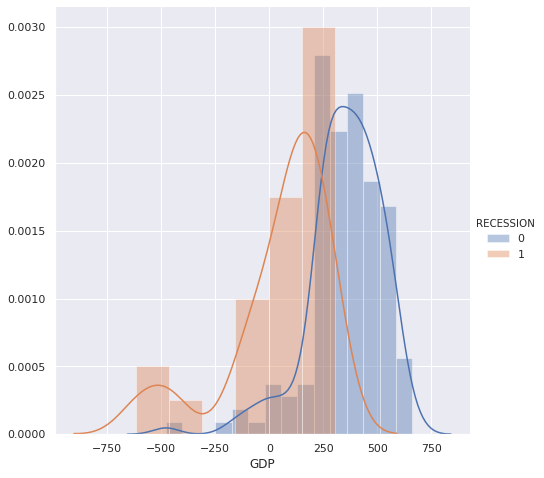

In [0]:
#sns.set(rc={'figure.figsize':(100,100)})
sns.FacetGrid(data_records,hue='RECESSION', size = 6.8).map(sns.distplot,'GDP').add_legend()

The above distribution plot shows that there is probability of recession when the values of "GDP" is 200 to 275

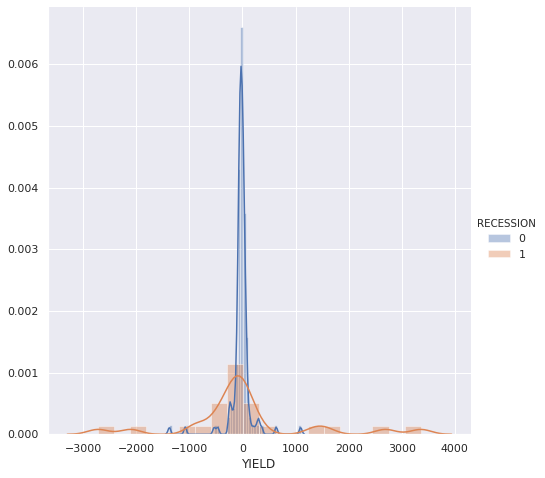

In [0]:
sns.FacetGrid(data_records,hue='RECESSION', size = 6.8).map(sns.distplot,'YIELD').add_legend()

**Observations**

* The above distribution plot looks similar to the normal distribution curve

* It indicates that there is a probability of Recession when the values of "YIELD" attribute are < zero (negative values)

* Whenever the yield curve is inverted, it is considered as a strong predecessor of the upcoming recession

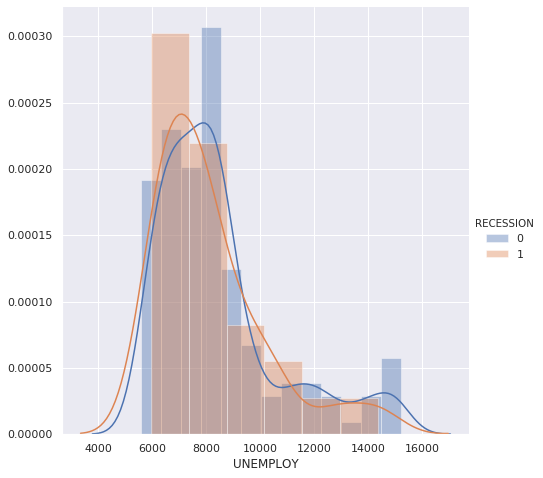

In [0]:
sns.FacetGrid(data_records,hue='RECESSION', size = 6.8).map(sns.distplot,'UNEMPLOY').add_legend()

**Observations**

* We can see from the abopve distribution plot that the probability of recession is high for values of "UNEMPLOY" attribute in the range of 6000 to 8000

* Unemployment is another strong indicator for probability of upcoming recession

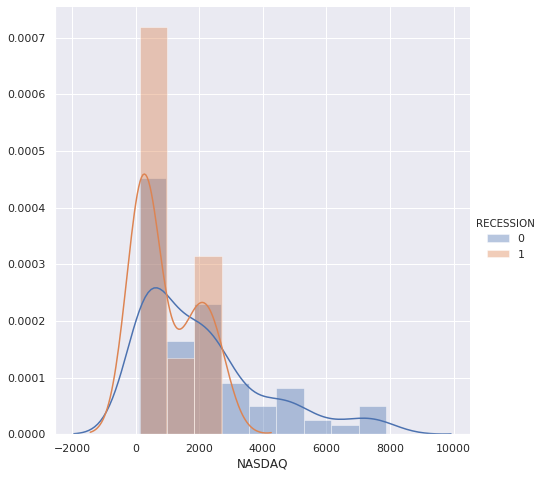

In [0]:
sns.FacetGrid(data_records,hue='RECESSION', size = 6.8).map(sns.distplot,'NASDAQ').add_legend()

**Observations**

* We can see from the abopve distribution plot that the probability of recession is high for values of "NASDAQ" attribute in the range of 0 to 1000

* Nasdaq is another complementary strong indicator for probability of upcoming recession

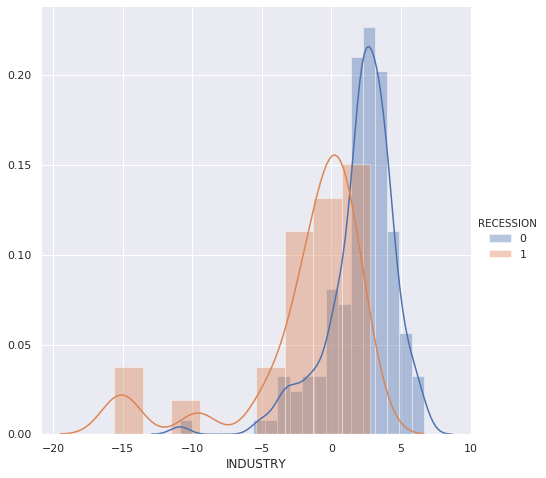

In [0]:
sns.FacetGrid(data_records,hue='RECESSION', size = 6.8).map(sns.distplot,'INDUSTRY').add_legend()

**Observations**

* We can see from the abopve distribution plot that the probability of recession is high for values of "INDUSTRY" attribute in the range of -5.0 to 2.0

* Industrial growth is another strong indicator for probability of upcoming recession

**Joint Plot**

**Scatter plot with marginal histograms**

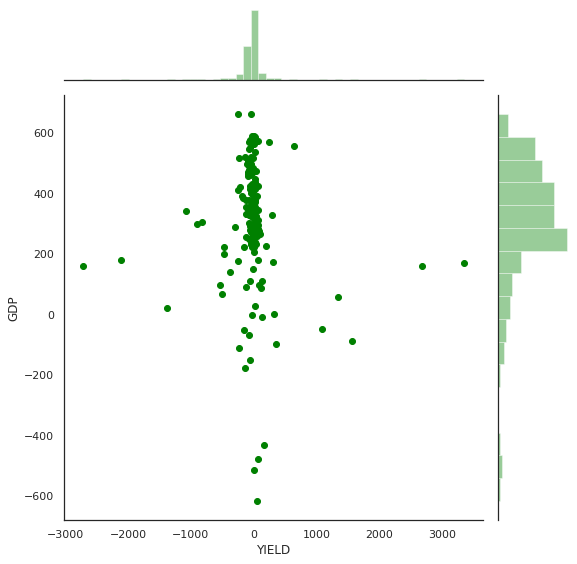

In [0]:
sns.set(style="white", color_codes=True)
g = sns.jointplot(x="YIELD", y="GDP", data=data_records, color='green', size=8)

**Observations**

* We can see from the above joint plot that the GDP index value is highest for the "YIELD" attribute value = 0.  

* Whenever the yield curve is inverted, the value of GDP also goes down, which in turn increases the probability of upcoming recession

**Regression and Kernel density fits**

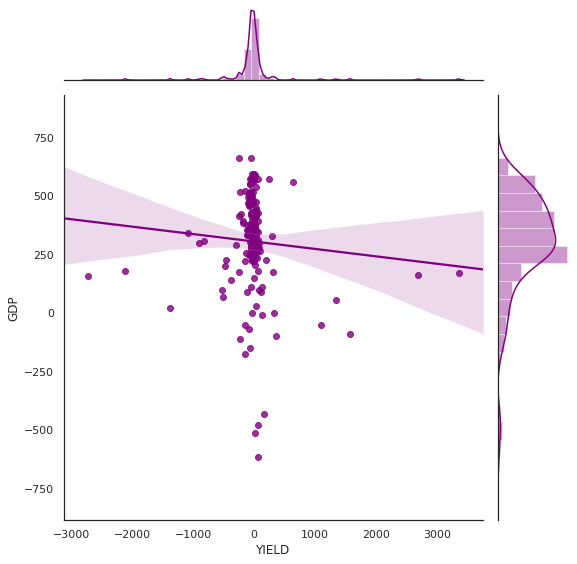

In [0]:
g = sns.jointplot("YIELD", "GDP", data=data_records, kind="reg", color='purple', size=8)

Regression and Kernel density fit graph for attributes "YIELD" and "GDP"

**Scatter plot with a joint histogram using hexagonal bins**

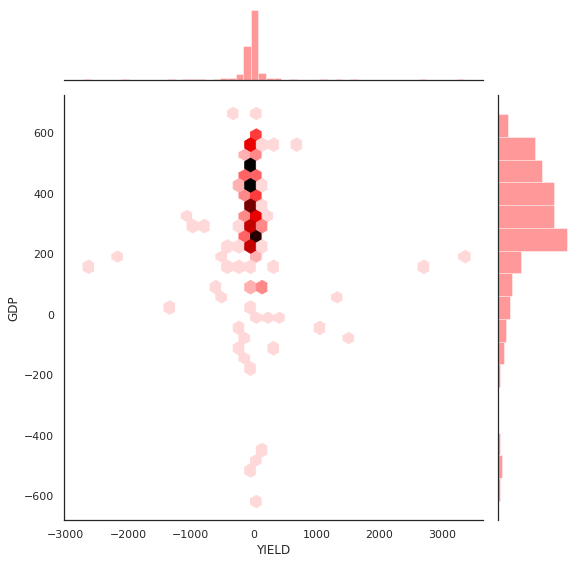

In [0]:
g = sns.jointplot("YIELD", "GDP", data=data_records, kind="hex", color='red', size=8)

**Scatter plot with density estimates**

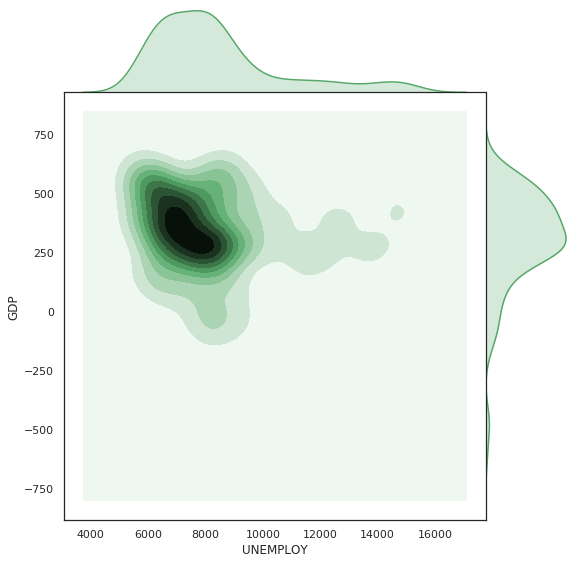

In [0]:
g = sns.jointplot("UNEMPLOY", "GDP", data=data_records,
                   kind="kde", space=0, color="g", size=8)

**Observations**

* The above graph shows the Kernel density estimate for attributes "GDP" and "UNEMPLOY"

* The clustering for "GDP" attribute is dense for the values of "UNEMPLOY" attribute in the range of 6000 to 8000

No handles with labels found to put in legend.


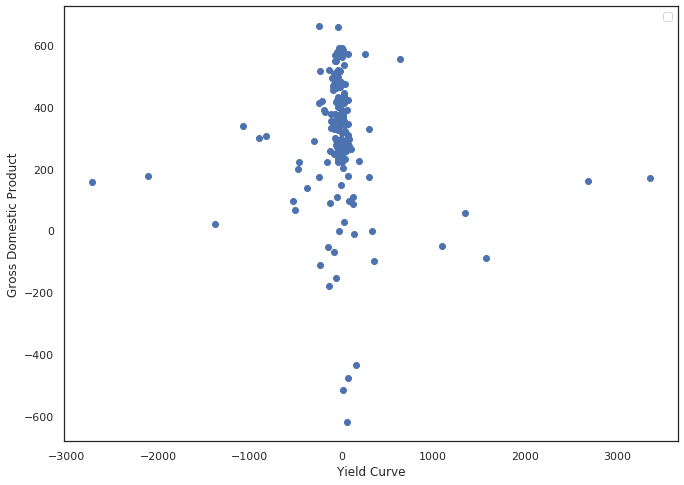

In [0]:
X = data_records[['YIELD','GDP']]
plt.scatter(X['YIELD'], X['GDP'])
plt.xlabel('Yield Curve')              #label for x axis
plt.ylabel('Gross Domestic Product')     #label for y axis
plt.legend()

**Observations**

* We can see from the above joint plot that the GDP index value is highest for the "YIELD" attribute value = 0.  

* Whenever the yield curve is inverted, the value of GDP also goes down, which in turn increases the probability of upcoming recession

**Data Cleaning - Scale the features in dataset**

In [0]:
#Import required library
from sklearn.preprocessing import MinMaxScaler

#Scale the values of NASDAQ, UNEMPLOY, YIELD, GDP and INDUSTRY factors

#Scale the NASDAQ values
scaler = MinMaxScaler()
scaler.fit(data_records.NASDAQ.values.reshape(-1,1))
data_records.NASDAQ = scaler.transform(data_records.NASDAQ.values.reshape(-1,1))

#Scale the UNEMPLOY values
scaler = MinMaxScaler()
scaler.fit(data_records.UNEMPLOY.values.reshape(-1,1))
data_records.UNEMPLOY = scaler.transform(data_records.UNEMPLOY.values.reshape(-1,1))

#Scale the YIELD values
scaler = MinMaxScaler()
scaler.fit(data_records.YIELD.values.reshape(-1,1))
data_records.YIELD = scaler.transform(data_records.YIELD.values.reshape(-1,1))

#Scale the GDP values
scaler = MinMaxScaler()
scaler.fit(data_records.GDP.values.reshape(-1,1))
data_records.GDP = scaler.transform(data_records.GDP.values.reshape(-1,1))

#Scale the INDUSTRY values
scaler = MinMaxScaler()
scaler.fit(data_records.INDUSTRY.values.reshape(-1,1))
data_records.INDUSTRY = scaler.transform(data_records.INDUSTRY.values.reshape(-1,1))

**Print the scaled dataset**

In [0]:
data_records

,DATE,NASDAQ,UNEMPLOY,YIELD,GDP,INDUSTRY,RECESSION
0,10/1/77,0.000000,0.109383,0.436097,0.718043,0.849316,0
1,1/1/78,0.000157,0.080972,0.436757,0.678327,0.799668,0
2,4/1/78,0.002093,0.052942,0.435232,0.777056,0.823389,0
3,7/1/78,0.003713,0.059144,0.431336,0.741346,0.819877,0
4,10/1/78,0.002396,0.050066,0.412620,0.810952,0.847382,0
...,...,...,...,...,...,...,...
162,4/1/18,0.933029,0.075982,0.438572,0.933564,0.858685,0
163,7/1/18,0.999731,0.056164,0.435827,0.927374,0.929488,0
164,10/1/18,0.914918,0.056025,0.436789,0.842960,0.890610,0
165,1/1/19,0.931445,0.075324,0.435616,0.864785,0.839447,0


**Scatter Plot**

# **4.4: Retrieve the statistical details**

In [0]:
data_records.describe()

,NASDAQ,UNEMPLOY,YIELD,GDP,INDUSTRY,RECESSION
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.231932,0.288809,0.444050,0.720749,0.767765,0.155689
std,0.240141,0.234824,0.084117,0.167890,0.147301,0.363650
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.036747,0.118530,0.435083,0.664302,0.711495,0.000000
50%,0.182717,0.243296,0.442720,0.740384,0.797722,0.000000
75%,0.318428,0.349179,0.451624,0.835757,0.857632,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Calculate mean**

In [0]:
from scipy import mean
mean_val = mean(data_records)
mean_val

#np.mean(data_records)

NASDAQ       0.231932
UNEMPLOY     0.288809
YIELD        0.444050
GDP          0.720749
INDUSTRY     0.767765
RECESSION    0.155689
dtype: float64

**Calculate median**

In [0]:
from scipy import median
val1 = data_records[['NASDAQ']]
nasdaq = median(val1)
nasdaq
#np.median(val1)


0.18271676961545977

In [0]:
val2 = data_records[['UNEMPLOY']]
unemploy = median(val2)
unemploy

#np.median(val2)

0.24329568293107562

In [0]:
val3 = data_records[['YIELD']]
yield_val = median(val3)
yield_val
#np.median(val3)

0.44272023463754995

In [0]:
val4 = data_records[['GDP']]
gdp = median(val4)
gdp
#np.median(val4)

0.7403836015305322

In [0]:
val5 = data_records[['INDUSTRY']]
industry = median(val5)
industry
#np.median(val5)

0.7977224801080125

**Calculate mode**

In [0]:
from scipy import stats
stats.mode(data_records)

ModeResult(mode=array([['1/1/00', 0.0, 0.07532395540588577, 0.0, 0.0, 0.0, 0]],
      dtype=object), count=array([[  1,   1,   2,   1,   1,   1, 141]]))

**Variance**

In [0]:

v = np.var(data_records)
print ("variance", v) 

variance NASDAQ       0.057322
UNEMPLOY     0.054812
YIELD        0.007033
GDP          0.028018
INDUSTRY     0.021568
RECESSION    0.131450
dtype: float64


# **4.5: Calculate correlation**

**Plot the pearson correlation matrix**

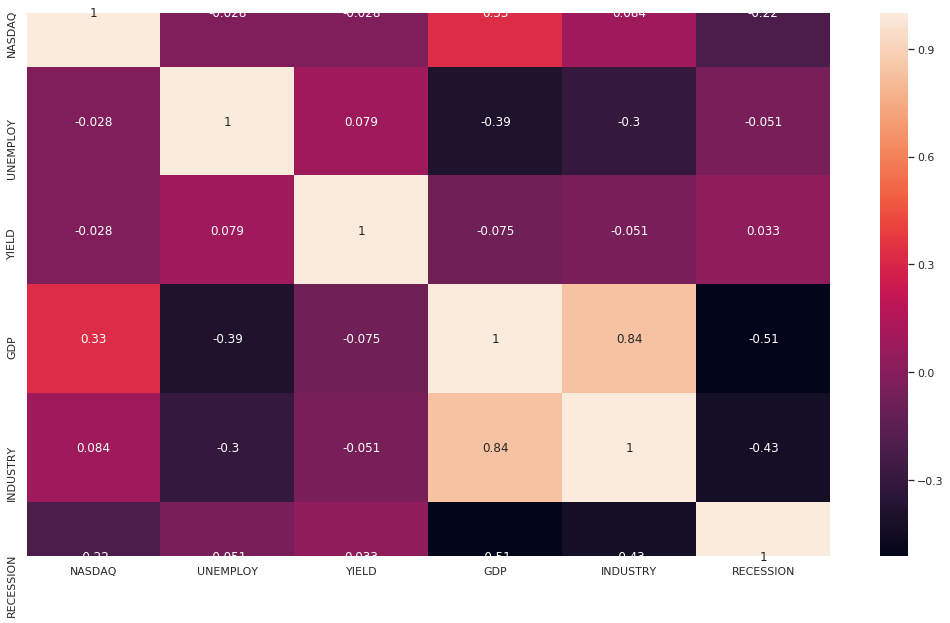

In [0]:
corr = data_records.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot = True)
plt.show()

# **4.6: Pair Plot** 

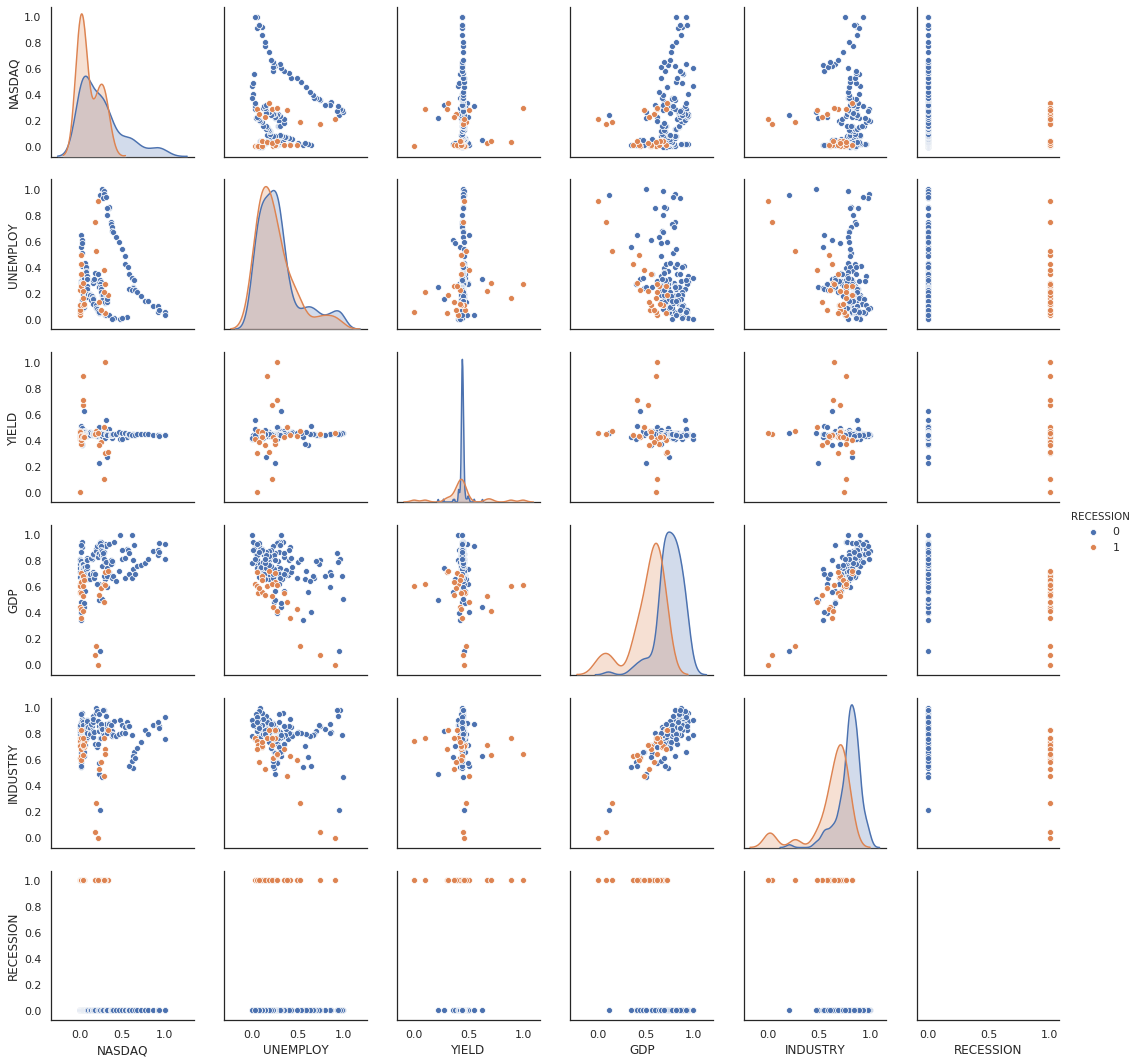

In [0]:
#Pair Plot to visualize how the data is distributed in dataset
pair_plot = sns.pairplot(data_records, hue='RECESSION')

# **4.7: Gini score**

([array([54., 17.,  6., 11., 15., 18., 11.,  6.,  2.,  4.,  2.,  4.,  5.,
          2.,  1.,  1.,  1.,  1.,  4.,  2.]),
  array([11., 21., 20., 20., 15., 25., 13.,  7.,  7.,  2.,  3.,  3.,  3.,
          2.,  4.,  0.,  1.,  3.,  3.,  4.]),
  array([  1.,   0.,   1.,   0.,   1.,   2.,   1.,   6., 107.,  40.,   2.,
           1.,   1.,   1.,   1.,   0.,   0.,   1.,   0.,   1.]),
  array([ 1.,  1.,  2.,  0.,  0.,  0.,  1.,  2.,  5.,  4.,  3.,  8.,  9.,
         29., 24., 19., 23., 18., 16.,  2.]),
  array([ 2.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  3.,  3.,  7.,  8.,
          9., 20., 32., 34., 32.,  9.,  6.]),
  array([141.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  26.])],
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 6 Lists of Patches objects>)

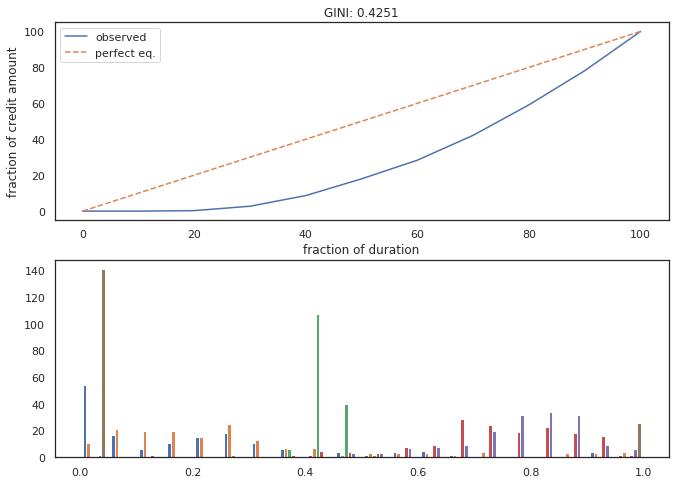

In [0]:
def G(v):
    bins = np.linspace(0., 100., 11)
    total = float(np.sum(v))
    yvals = []
    for b in bins:
        bin_vals = v[v <= np.percentile(v, b)]
        bin_fraction = (np.sum(bin_vals) / total) * 100.0
        yvals.append(bin_fraction)
    # perfect equality area
    pe_area = np.trapz(bins, x=bins)
    # lorenz area
    lorenz_area = np.trapz(yvals, x=bins)
    gini_val = (pe_area - lorenz_area) / float(pe_area)
    return bins, yvals, gini_val

features = data_records.drop(['DATE'],axis='columns')
v = np.array(features)
bins, result, gini_val = G(v)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(bins, result, label="observed")
plt.plot(bins, bins, '--', label="perfect eq.")
plt.xlabel("fraction of duration")
plt.ylabel("fraction of credit amount")
plt.title("GINI: %.4f" %(gini_val))
plt.legend()
plt.subplot(2, 1, 2)
plt.hist(v, bins=20)

**Data Narative:**

The Gini Coefficient or Gini Index measures the inequality among values of a variable. The above Gini score is calculated using Laurenz curve. Higher the value of an index, more dispersed is the data. Alternatively, the Gini coefficient can be looked like half of the relative mean absolute difference.

**Gini Score = 0.4251**

# **4.8: Feature_importance with xgboost**

**Create list with categorical and numerical values**

In [0]:
#create quickaccess list with categorical variables labels
catvars = ['DATE']
#create quickaccess list with numerical variables labels
numvars = ['NASDAQ', 'UNEMPLOY', 'YIELD', 'GDP', 
           'INDUSTRY', 'RECESSION']
# Numerical features range of values
for x in range(len(numvars)):
    print(numvars[x],": ", data_records[numvars[x]].min()," - ",data_records[numvars[x]].max())

NASDAQ :  0.0  -  1.0
UNEMPLOY :  0.0  -  0.9999999999999999
YIELD :  0.0  -  1.0
GDP :  0.0  -  1.0
INDUSTRY :  0.0  -  1.0
RECESSION :  0  -  1


**Rescaling and standardization of the data**

In [0]:
# Standardization
numdata_std = pd.DataFrame(StandardScaler().fit_transform(data_records[numvars].drop(['RECESSION'], axis=1)))
# MinMax Rescaling to [0,1]
numdata_minmax = pd.DataFrame(MinMaxScaler().fit_transform(data_records[numvars].drop(['RECESSION'], axis=1)))
print("success")

success


In [0]:
dummyvars = pd.get_dummies(data_records[numvars])

**Plot the feature importance**

Text(0.5, 0, 'Recession Probability')

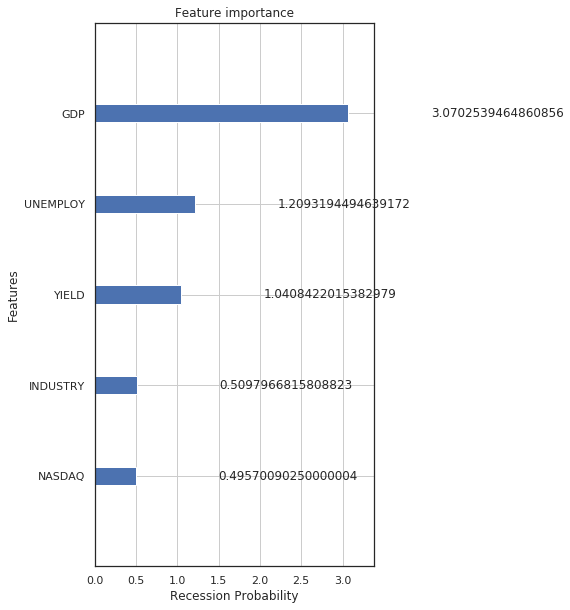

In [0]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot



# split data into X and y
X = dummyvars.drop(['RECESSION'],axis='columns')
y = data_records[['RECESSION']]

# fit model no training data
model = XGBClassifier()
model.fit(X, y)
ax = plot_importance(model, importance_type='gain')
fig = ax.figure
fig.set_size_inches(5, 10)
ax.set_xlabel('Recession Probability')

* Feature **"GDP"** is the most important feature as per the implementation of xgboost algorithm

* The coefficient value for **"GDP"** attribute is **3.07**

# **Step 5. Data Prep: Curation**


# **5.1: Feature Selection and Extraction : what are the main features to use in this data set?**

**Feature Selection using corelation matrix**

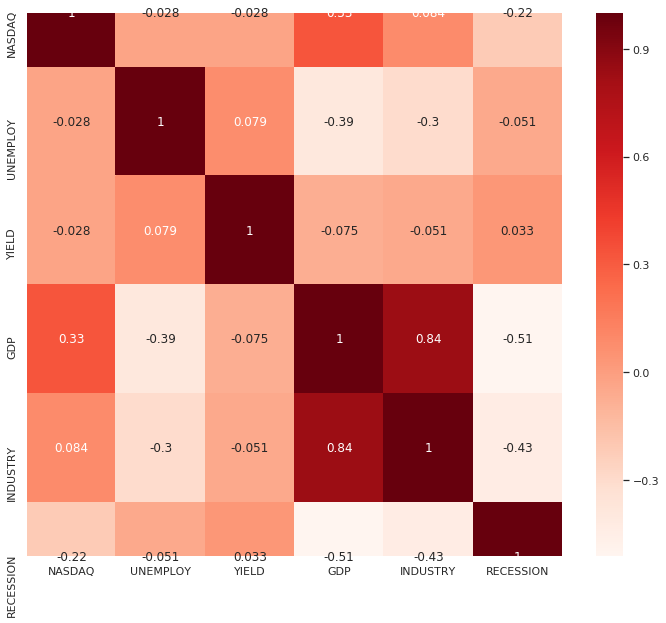

In [0]:
#Using Pearson Correlation, print the pearson correlation matrix
plt.figure(figsize=(12,10))
cor = data_records.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

The correlation matrix shows the relationship between features of the dataset

In [0]:
#Correlation with output variable
cor_target = abs(cor["RECESSION"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

GDP          0.51325
RECESSION    1.00000
Name: RECESSION, dtype: float64

**Feature Selection using XGboost**

[0.14514479 0.15115774 0.26204212 0.20026695 0.2413884 ]


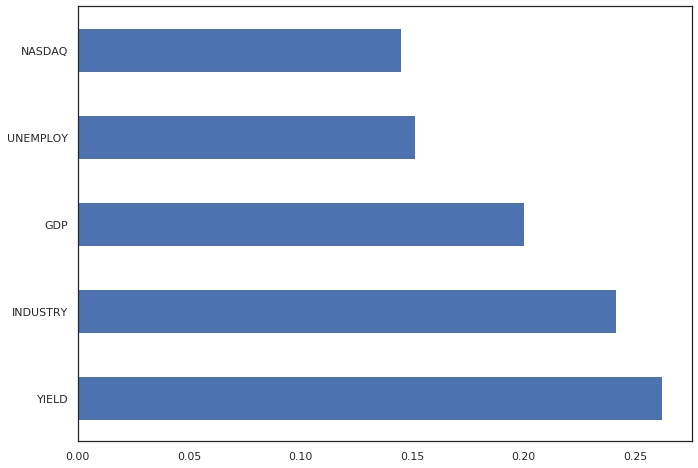

In [0]:
X = dummyvars.drop(['RECESSION'],axis='columns')
y = data_records[['RECESSION']]
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# **5.2 Data Verification: Do we have enough data?**

Yes, we have enough data. Initially we had 4 columns out of which we selected key features in the previous feature selection step. Next stage we chose GDP from the 2nd dataset. In the last stage after regression, we added Industrial Growth from the 3rd dataset to our main dataset.


# **5.3 Possibility of Amalgamation1: Add Dataset 2**

Our initial dataset contained the following attributes:
**NASDAQ, UNEMPLOYMENT and DATE in a monthly timeline.**
	
1st Enrichment: We found a dataset on Gross Domestic Product (GDP) of the US. This was available only in a quarterly timeline. Our initial dataset timeline was changed from monthly to quartlerly and we added this attribute to our dataset as part of the first. enrichment.
	
2nd Enrichment: We found a dataset on Industrial Growth (IND). The timeline was adjusted to quarterly and was added to our dataset as part of the second enrichment

# **5.4: Data Cleansing**

**Check for missing values**

In [0]:
print(data_records.isnull().sum().sum())


0


No missing values encountered in the dataset

**Binarize the output with 0 = 'bad' credit; 1 = 'good' credit**

In [0]:
# Binarize the y output for easier use of e.g. ROC curves -> 0 = 'bad' credit; 1 = 'good' credit
data_records.RECESSION.replace([1,2], [1,0], inplace=True)
# Print number of positive recession counts (should be 26) and number of negative recession counts (should be 141)
data_records.RECESSION.value_counts()

0    141
1     26
Name: RECESSION, dtype: int64

In [0]:
data_records.head()

,DATE,NASDAQ,UNEMPLOY,YIELD,GDP,INDUSTRY,RECESSION
0,10/1/77,0.000000,0.109383,0.436097,0.718043,0.849316,0
1,1/1/78,0.000157,0.080972,0.436757,0.678327,0.799668,0
2,4/1/78,0.002093,0.052942,0.435232,0.777056,0.823389,0
3,7/1/78,0.003713,0.059144,0.431336,0.741346,0.819877,0
4,10/1/78,0.002396,0.050066,0.412620,0.810952,0.847382,0


# **5.5: Regularization**

Reducing the coefficients of features closer to 'zero' using **Lasso Regression**

----------------Lasso Regression------------------------
Predictors and their regression coefficients:
NASDAQ : -0.025907263343333525
UNEMPLOY : -0.10641359857220084
YIELD : 0.06063554055894896
GDP : -0.18994946181810118
INDUSTRY : -0.036689787676481435

Alpha: 0.0


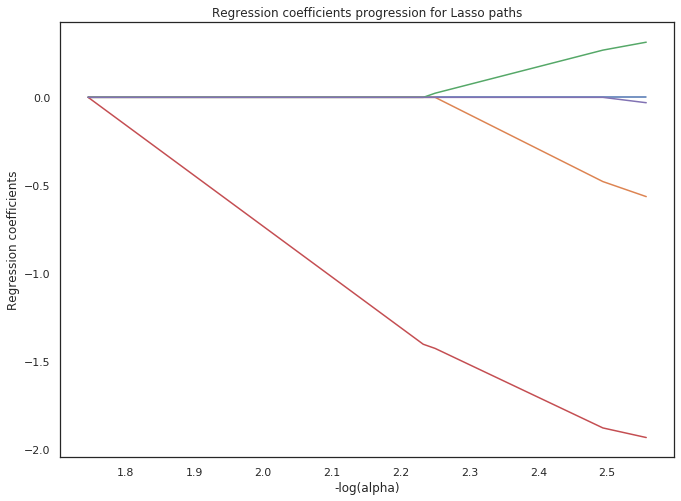

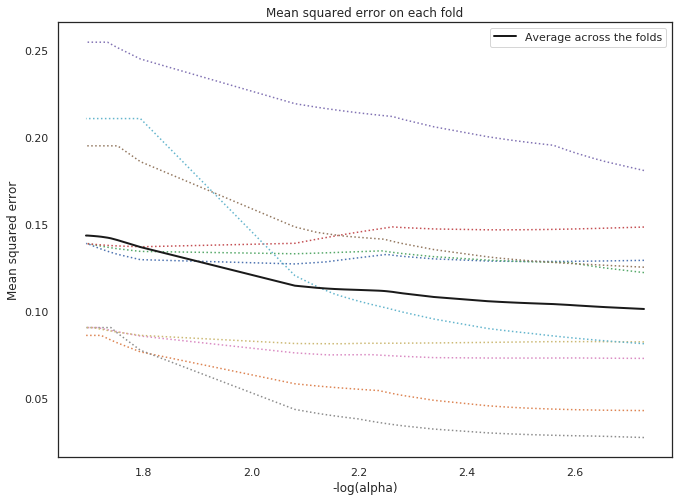


Mean squared error for training data: 0.09271249342181817

Mean squared error for training data: 0.09271249342181817
Mean squared error for test data: 0.08600897133842678

R-square for training data: 0.3502399419354244
R-square for test data: 0.171446909439822


In [0]:
from sklearn import preprocessing
from sklearn.linear_model import LassoLarsCV
from sklearn.metrics import mean_squared_error
from math import sqrt

def lasso_regr(data_set):
  
    # data_records = data_records.drop(['DATE'],axis='columns')
    pred = data_records[["NASDAQ", 'UNEMPLOY', 'YIELD', 'GDP','INDUSTRY']]
    predictors = pred
    targets = data_records.RECESSION

    # standardize predictors to have mean=0 and sd=1
    predictors = pd.DataFrame(preprocessing.scale(pred))
  
    predictors.columns = pred.columns
    # print(predictors.head())

    # split into training and testing sets
    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.3, random_state=123)

    # specify the lasso regression model
    model = LassoLarsCV(cv=10, precompute=False).fit(pred_train, tar_train)

    print('Predictors and their regression coefficients:')
    d = dict(zip(predictors.columns, model.coef_))
    for k in d:
        print(k, ':', d[k])

    # plot coefficient progression
    m_log_alphas = -np.log10(model.alphas_)
    # ax = plt.gca()
    plt.plot(m_log_alphas, model.coef_path_.T)
    print('\nAlpha:', model.alpha_)
    plt.axvline(-np.log10(model.alpha_), linestyle="dashed", color='k', label='alpha CV')
    plt.ylabel("Regression coefficients")
    plt.xlabel("-log(alpha)")
    plt.title('Regression coefficients progression for Lasso paths')
    plt.show()

    # plot mean squared error for each fold
    m_log_alphascv = -np.log10(model.cv_alphas_)
    plt.plot(m_log_alphascv, model.mse_path_, ':')
    plt.plot(m_log_alphascv, model.mse_path_.mean(axis=-1), 'k', label='Average across the folds', linewidth=2)
    plt.legend()
    plt.xlabel('-log(alpha)')
    plt.ylabel('Mean squared error')
    plt.title('Mean squared error on each fold')
    plt.show()

    # Mean squared error from training and test data
    train_error = mean_squared_error(tar_train, model.predict(pred_train))
    test_error = mean_squared_error(tar_test, model.predict(pred_test))
    print('\nMean squared error for training data:', train_error)
    # Mean squared error from training and test data
    train_error = mean_squared_error(tar_train, model.predict(pred_train))
    test_error = mean_squared_error(tar_test, model.predict(pred_test))
    print('\nMean squared error for training data:', train_error)
    print('Mean squared error for test data:', test_error)

    rsquared_train = model.score(pred_train, tar_train)
    rsquared_test = model.score(pred_test, tar_test)
    print('\nR-square for training data:', rsquared_train)
    print('R-square for test data:', rsquared_test)
#
print('----------------Lasso Regression------------------------')
#records = data_records.drop(['DATE', 'RECESSION'],axis='columns'
lasso_regr(data_records)

The implementation of Lasso Regression yields the above results. 

**Observation**
1. The coefficients for all the attributes/features is closer to zero as expected

2. The graph for -log(alpha) gives graph similar to pythagoras theorem

3. Mean Squared Error on each fold decreases with increase in value of log alpha

# **5.6: Normalization**

**Apply Principal Component Analysis for Dimensionality Reduction**

In [0]:
#Print the columns in dataset

data_records.columns

Index(['DATE', 'NASDAQ', 'UNEMPLOY', 'YIELD', 'GDP', 'INDUSTRY', 'RECESSION'], dtype='object')

**Divide the dataset into features and target variable**

In [0]:
features = ['NASDAQ', 'UNEMPLOY', 'YIELD', 'GDP',
       'INDUSTRY']
x = data_records.loc[:,features].values
y = data_records.loc[:,['RECESSION']].values #target variable

**Standardize the data**

In [0]:
#Step 1: Standardize the data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(x) 

**Print first few records of the standardized dataset**

In [0]:
pd.DataFrame(data = X, columns = features).head()

,NASDAQ,UNEMPLOY,YIELD,GDP,INDUSTRY
0,-0.968722,-0.766384,-0.094835,-0.016164,0.555296
1,-0.968067,-0.887737,-0.086967,-0.253440,0.217232
2,-0.959981,-1.007461,-0.105146,0.336388,0.378753
3,-0.953213,-0.980971,-0.151602,0.123050,0.354842
4,-0.958713,-1.019745,-0.374771,0.538893,0.542131


**PCA Projection**

**Principal Component Analysis to reduce the dimensionality of the dataset**

In [0]:
# Setp 2 : PCA Projection to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform (x)
principalDf = pd.DataFrame(data = principalComponents, columns=['PC1','PC2']) #PC = Principal component 
principalDf.head()

,PC1,PC2
0,-0.019860,-0.300667
1,-0.000482,-0.310105
2,-0.076150,-0.329788
3,-0.054241,-0.323733
4,-0.103897,-0.335095


**Concatenate DataFrame with the label 'RECESSION'**

In [0]:
finalDf = pd.concat([principalDf,data_records[['RECESSION']]], axis = 1)
finalDf.head()

,PC1,PC2,RECESSION
0,-0.019860,-0.300667,0
1,-0.000482,-0.310105,0
2,-0.076150,-0.329788,0
3,-0.054241,-0.323733,0
4,-0.103897,-0.335095,0


**Visualize the Principal Component Analysis**

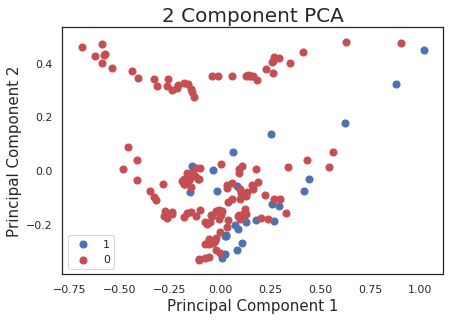

In [0]:
# Step 3 - Visualize the Data in 2D.
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2,2,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = [1,0]

colors = ['b','r']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['RECESSION'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
plt.show()

**Observation from visulaizations**

* The dimensionality of attributes in the dataset is reduced to two components using **Principal Component Analysis**

* The two PCA components can be visualized with 2D projection graph 

**Calculate the variance ratio**

In [0]:
pca.explained_variance_ratio_

array([0.44087104, 0.32817915])

In [0]:
print(pca)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


# **Step 6. Unsupervised Exploration : Find relevant Clusters in Your Data**

1. **How many clusters? Explore different k’s.**

    We chose 3 clusters. 

2. **Select Clustering algorithms, run several and compare in a table**

    KMeans, GMM (Tried with different combinations of the factors like: 
    NASDAQ vs Yield
    GDP vs Unemployment
    Yield vs Unemployment


3. **What does each cluster mean? How do they contribute to your Data Narrative (Story)**

    Each cluster was based on different time-based factor and indicated one of the key features for Recession. 

    Nasdaq vs Unemployment -> Inversely Proportional
    Yield vs GDP -> Directly Proportional
    Nasdaq vs GDP -> Directly Proportional
    Industrial Growth vs Nasdaq -> Directly Proportional
    Nasdaq vs Yield -> Directly Proportional
    Yield vs Unemployment ->  Inversely Proportional


4. **Measure goodness of your clusters (e.g., BICs)**

    Since our dataset includes time series data, so it was difficult to get proper clusters. Although we saw values are clustered around positive and negative values. 


# **6.1 How many clusters? Explore different k’s…**

## **K Means Clustering**

In [0]:
print(principalComponents.shape)

(167, 2)


**Simple plotting of the data** 

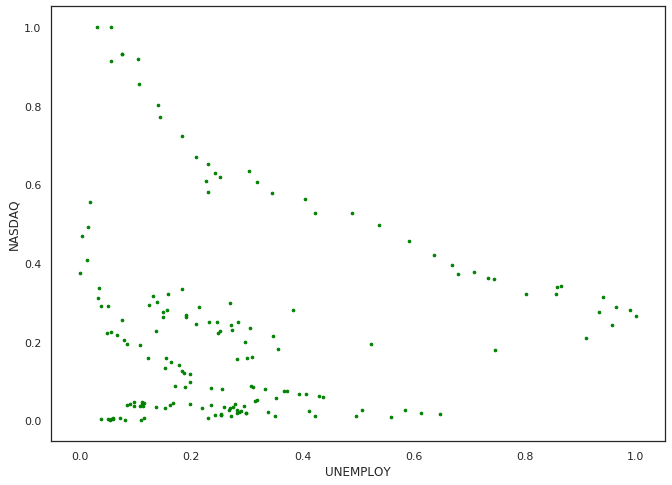

In [0]:
f1 = data_records['UNEMPLOY'].values
f2 = data_records['NASDAQ'].values

plt.xlabel('UNEMPLOY')                    #label on x-axis
plt.ylabel('NASDAQ')                      #label on y-axis
plt.scatter(f1, f2, c='green', s=7)
plt.show()

**Visualization observations:**

*  The Scatterplot of "UNEMPLOY" and "NASDAQ" attributes indicates that the decrease in value of NASDAQ index (market) growth results in increase in unemployment

* Decrease in market growth is a strong indicator of recession probability

* Both the attributes, "UNEMPLOY" and "NASDAQ" are inversely proportional

**Applying K-means on the selected attributes from dataset**

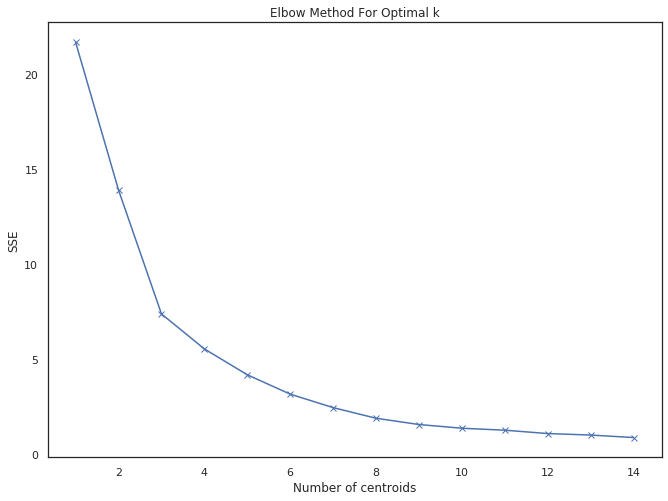

In [0]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
sse = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(principalComponents)
    sse.append(km.inertia_)
plt.plot(K, sse, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

The elbow method is used to find the optimal number of k - 'number of clusters'. From above graph, we can see that the optimal number of clusters with elbow method is **k = 3**

Text(0, 0.5, 'NASDAQ')

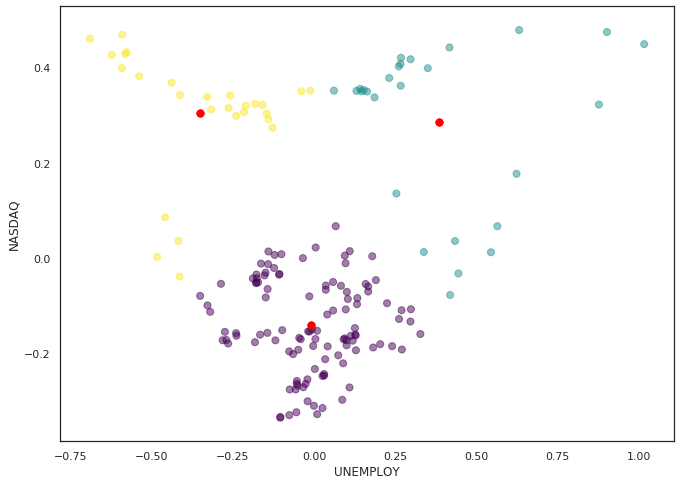

In [0]:
#converting our projected array to pandas df
pca=pd.DataFrame(principalComponents)
pca.columns=['First component','Second Component']
#build our algorithm with k=3, train it on pca and make predictions
kmeans = KMeans(n_clusters=3, random_state=0).fit(pca)
y_kmeans = kmeans.predict(pca)
#plotting the results 
plt.scatter(pca['First component'], pca['Second Component'], c=y_kmeans, s=50, alpha=0.5,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
plt.xlabel('UNEMPLOY')
plt.ylabel('NASDAQ')

The implementation of K-means clustering algorithm on the Recession dataset yields the result as shown above. The features in the dataset are grouped into three clusters.

**Observation:**
* The objective of implementing K-means clustering model on the dataset is to identify the relationship between the attributes and group them in respective clusters based on their similar characteristics. 

* We found out that the attributes:
  * "NASDAQ" and "UNEMPLOY" are inversely proportional

  * "YIELD" and "GDP" are inversely proportional

  * "NASDAQ" and "GDP" are directly proportional

* Thus, the attributes, "NASDAQ" and "GDP" are grouped into one cluster, "YIELD" and "UNEMPLOY" in second cluster, and "INDUSTRY" in the third cluster

* The above graph for K-means shows that the dataset is grouped into three clusters - 1, 2 , and 3. Each cluster indicates that the attributes "NASDAQ" - Market growth index and "UNEMPLOY" - Rate of unemployment are a strong factor in deciding if the recession will happen or not

In [0]:
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [0]:
data_records['Clusters'] = y_kmeans
data_records.head()

,DATE,NASDAQ,UNEMPLOY,YIELD,GDP,INDUSTRY,RECESSION,Clusters
0,10/1/77,0.000000,0.109383,0.436097,0.718043,0.849316,0,0
1,1/1/78,0.000157,0.080972,0.436757,0.678327,0.799668,0,0
2,4/1/78,0.002093,0.052942,0.435232,0.777056,0.823389,0,0
3,7/1/78,0.003713,0.059144,0.431336,0.741346,0.819877,0,0
4,10/1/78,0.002396,0.050066,0.412620,0.810952,0.847382,0,0


In [0]:
from sklearn.metrics import accuracy_score
data_records['y_kmeans'] = y_kmeans
print(accuracy_score(y,data_records['y_kmeans'] ))

0.592814371257485


Goodness of the cluster is measured by calculating the accuracy of K-means algorithm. From above, we can see that the accuracy score is > 0, so our algorithm performs well.

# **Performance Evaluation Of Kmeans Algorithm**

**Using Silhouette Analysis**

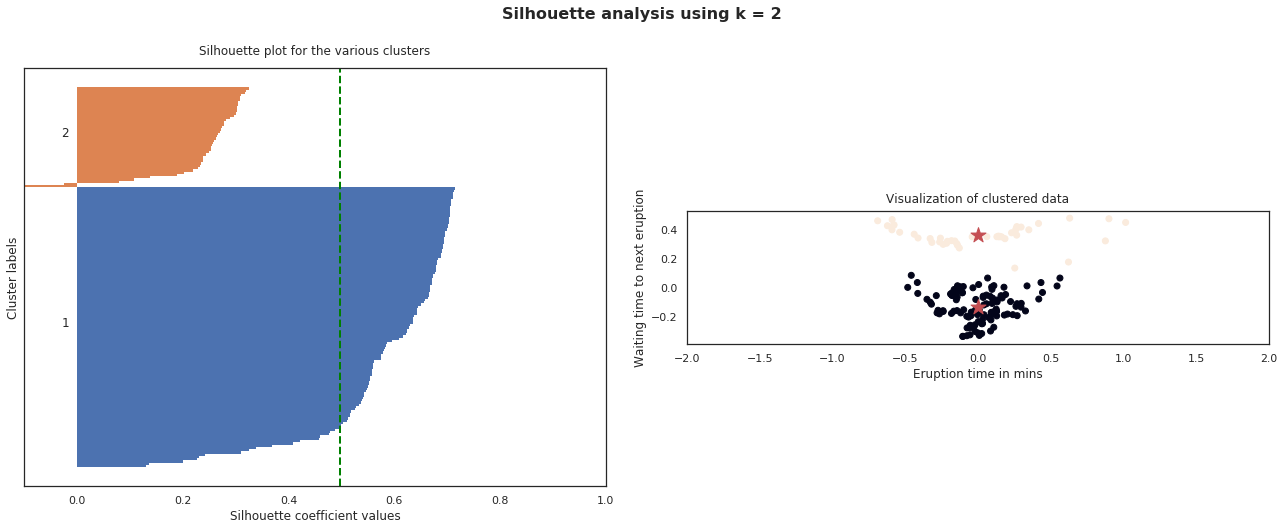

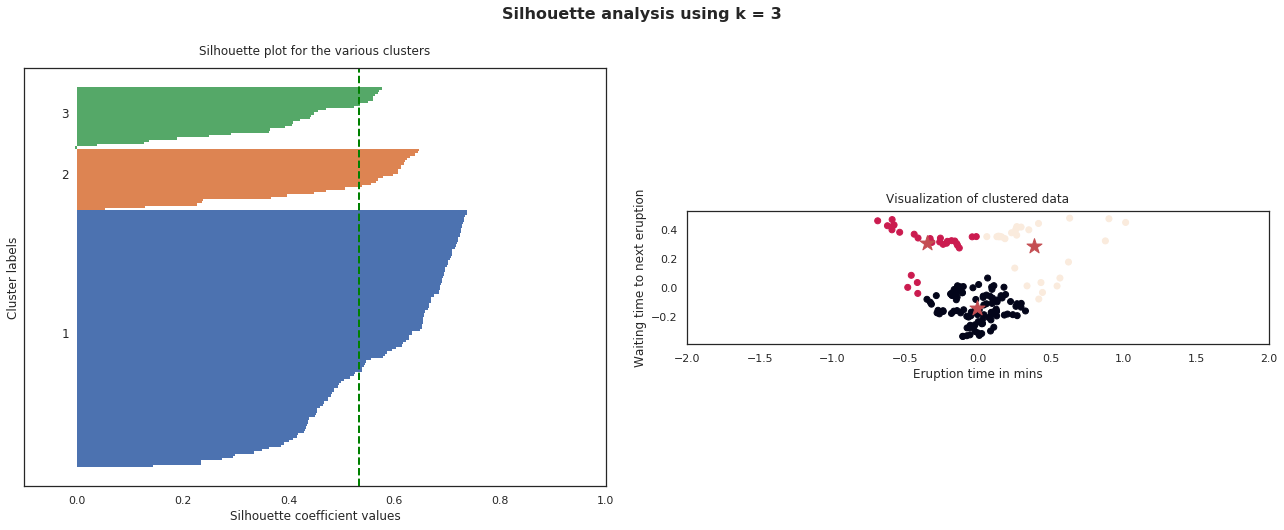

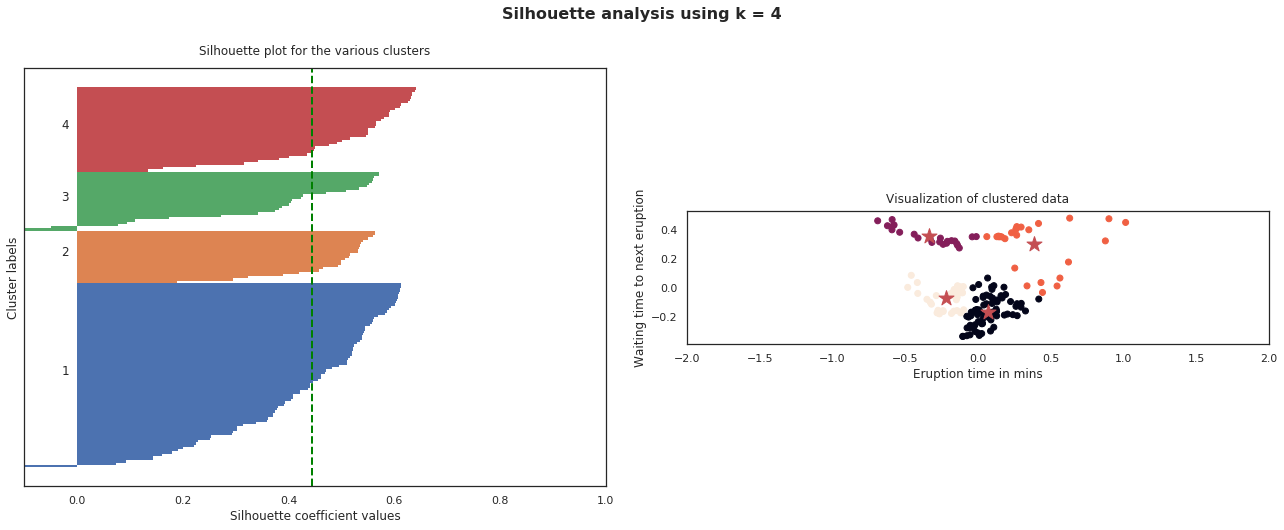

In [0]:
#Performance Evaluation

from sklearn.metrics import silhouette_samples, silhouette_score

for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(pca)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(pca, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(pca['First component'], pca['Second Component'], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

The above graphs show that n_clusters=3 has the best average silhouette score of around 0.57 and all clusters being above the average shows that it is actually a good choice. Also, the thickness of the silhouette plot gives an indication of how big each cluster is. The plot shows that cluster 1 has almost double the samples than cluster 2. However, as we increased n_clusters to 4, the average silhouette score decreased dramatically to around 0.42. Moreover, the thickness of silhouette plot started showing wide fluctuations. Good n_clusters will have a well above 0.5 silhouette average score as well as all of the clusters have higher than the average score.

## **Gaussian Mixture Model**

In [0]:
pca=pd.DataFrame(principalComponents)

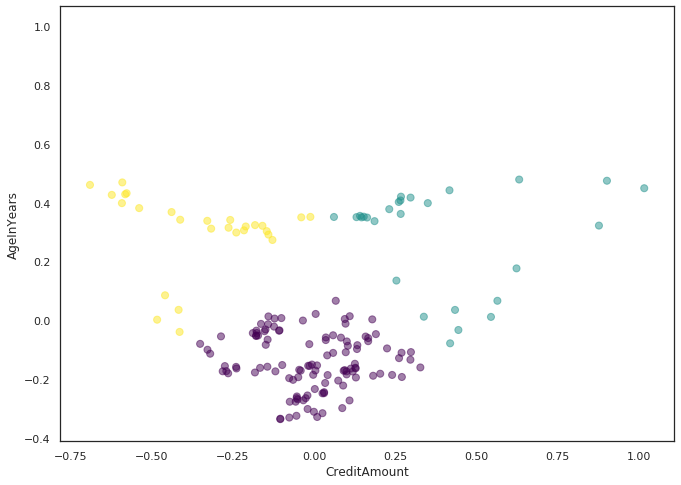

In [0]:
#converting our projected array to pandas df
from sklearn.mixture import GaussianMixture

f1 = data_records['UNEMPLOY'].values
f2 = data_records['NASDAQ'].values
pca=pd.DataFrame(principalComponents)
pca.columns=['First component','Second Component']
#build our algorithm with k=3, train it on pca and make predictions
gmm = GaussianMixture(n_components=3, random_state=0).fit(pca)
labels = gmm.predict(pca)
#plotting the results 
plt.scatter(pca['First component'], pca['Second Component'], c=y_kmeans, s=50, alpha=0.5,cmap='viridis')
# centers = gmm.covariances_
# plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
# plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
plt.xlabel('CreditAmount')
plt.ylabel('AgeInYears')

colors = ['b', 'g', 'm']
# markers = ['o', 'v', 'x']
for i, l in enumerate(labels):
    plt.plot(f1[i], f2[i], color=colors[l],ls='None')

The implementation of GMM clustering algorithm on the Recession dataset yields the result as shown above. The features in the dataset are grouped into three clusters.

**Observation:**
* The objective of implementing K-means clustering model on the dataset is to identify the relationship between the attributes and group them in respective clusters based on their similar characteristics. 

* We found out that the attributes:
  * "NASDAQ" and "UNEMPLOY" are inversely proportional

  * "YIELD" and "GDP" are inversely proportional

  * "NASDAQ" and "GDP" are directly proportional

* Thus, the attributes, "NASDAQ" and "GDP" are grouped into one cluster, "YIELD" and "UNEMPLOY" in second cluster, and "INDUSTRY" in the third cluster

* The above graph for K-means shows that the dataset is grouped into three clusters - 1, 2 , and 3. Each cluster indicates that the attributes "NASDAQ" - Market growth index and "UNEMPLOY" - Rate of unemployment are a strong factor in deciding if the recession will happen or not

In [0]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(pca).predict(pca)
    probs = gmm.predict_proba(pca)
    print("Matrix of size [n_samples, n_clusters]: \n\n", probs[:5].round(3))
    size = 50 * probs.max(1) ** 2  # square emphasizes differences
    if label:
        #print("In If block")
        ax.scatter(pca['First component'], pca['Second Component'], c=labels, s=size, cmap='viridis', zorder=2)
    else:
        #print("In else block")
        ax.scatter(pca['First component'], pca['Second Component'], s=size, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

Matrix of size [n_samples, n_clusters]: 

 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


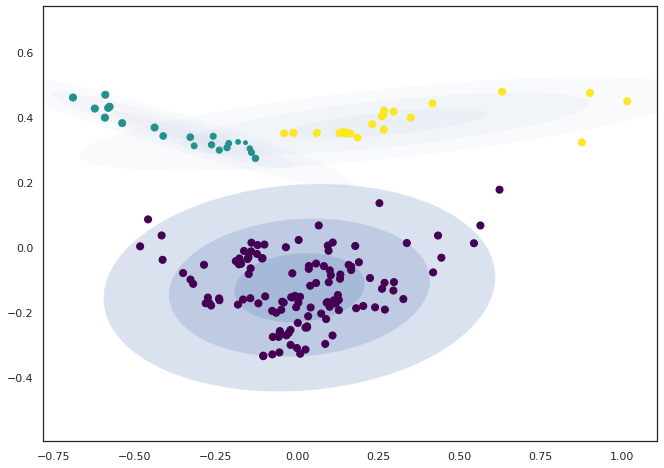

In [0]:

gmm = GaussianMixture(n_components=3, random_state=30)
plot_gmm(gmm,pca)

GMM clusters with Ellipses

# **Performance Evaluation Of GMM**

**Accuracy**

In [0]:
from sklearn import metrics
data_records['labels'] = labels
metrics.accuracy_score(y,data_records['labels'] )

0.6167664670658682

**Goodness of the cluster** is measured by calculating the accuracy of GMM algorithm. From above, we can see that the accuracy score is > 0, so our algorithm performs well.

**Using Silhouette Analysis**

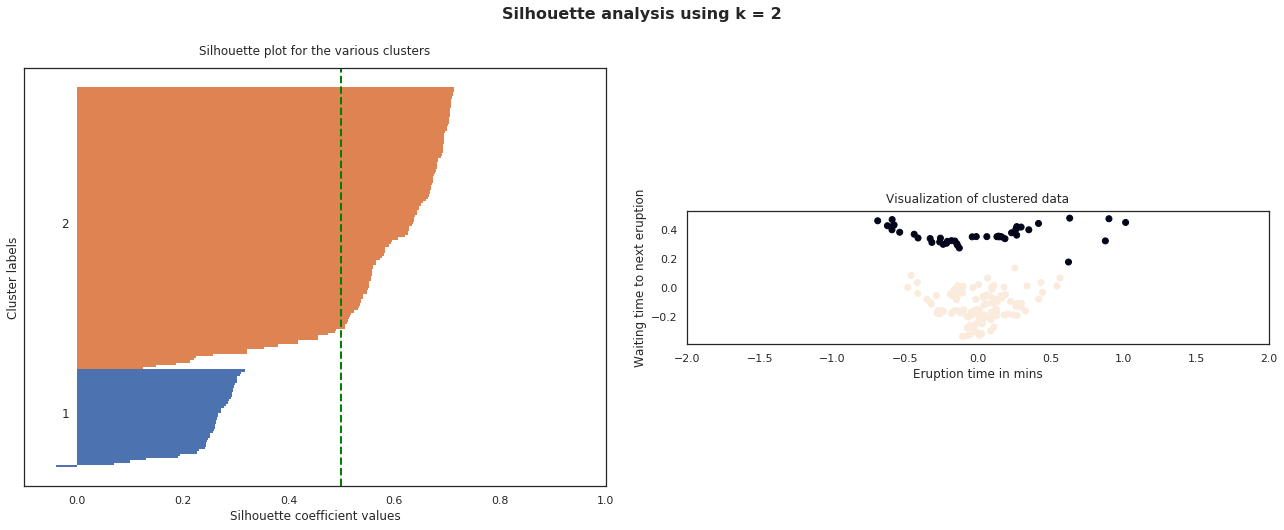

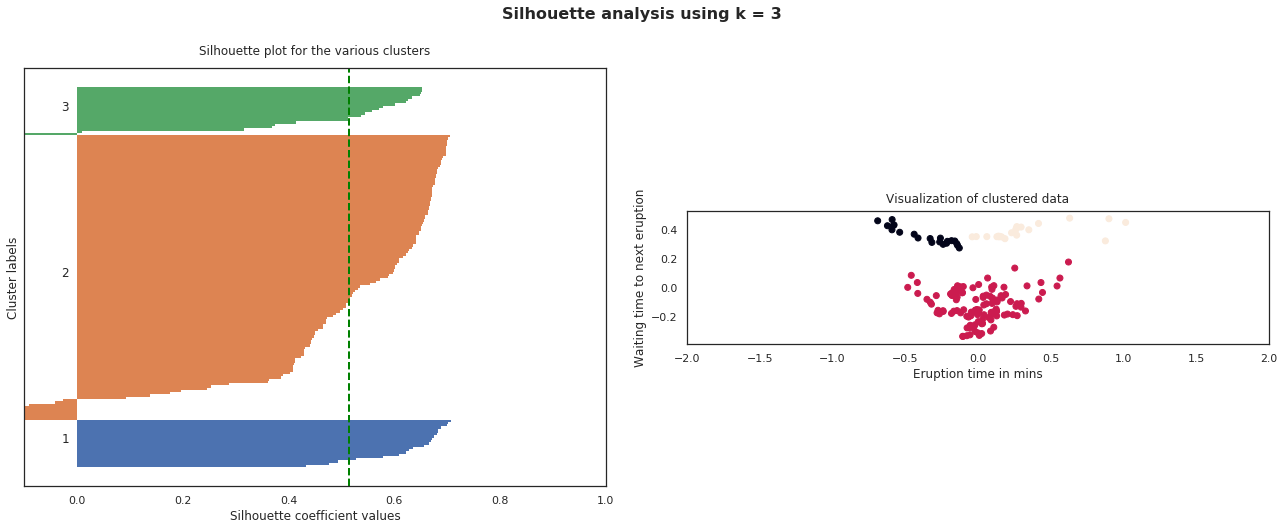

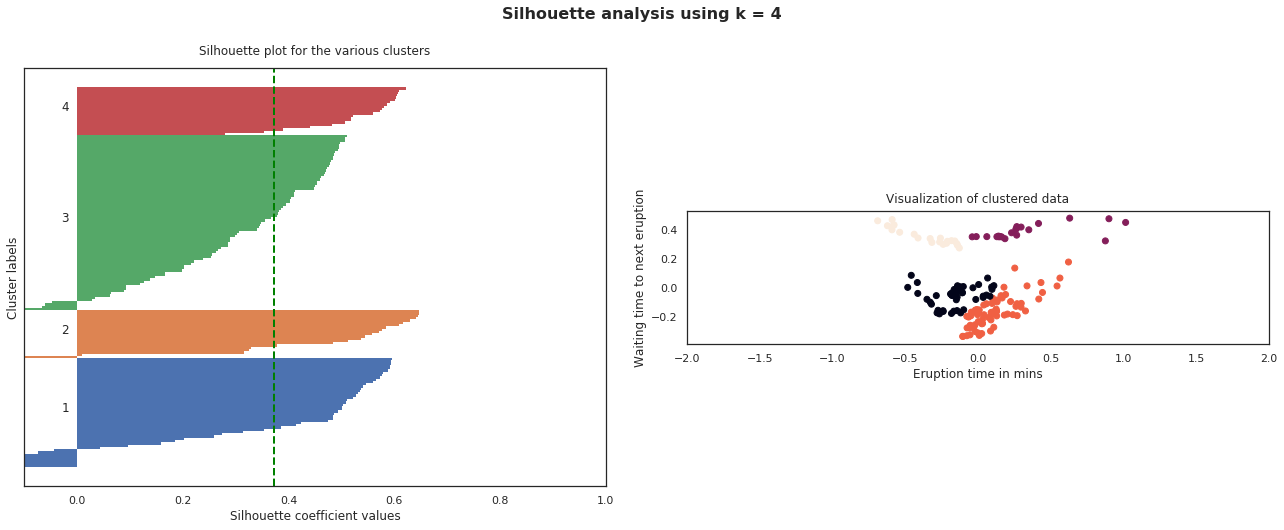

In [0]:
#Performance Evaluation
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    gmm = GaussianMixture(n_components=k)
    labels = gmm.fit_predict(pca)
    # centroids = gmm.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(pca, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(pca['First component'], pca['Second Component'], c=labels)
    # ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

The above graphs show that n_clusters=3 has the best average silhouette score of around 0.56 and all clusters being above the average shows that it is actually a good choice. Also, the thickness of the silhouette plot gives an indication of how big each cluster is. The plot shows that cluster 1 has almost double the samples than cluster 2. However, as we increased n_clusters to 4, the average silhouette score decreased dramatically to around 0.39. Moreover, the thickness of silhouette plot started showing wide fluctuations. Good n_clusters will have a well above 0.5 silhouette average score as well as all of the clusters have higher than the average score.

# **Comparison of Kmeans and GMM Clustering Algorithm**

In [0]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Metric", "Kmeans Clustering", "GMM Clustering"]

x.add_row(["Accuracy Score ", 0.592, 0.616])
x.add_row(["Silhoette Analysis","k = 2 Average Value: 0.50", "k = 2 Average Value: 0.50"])
x.add_row(["Silhoette Analysis","k = 3 Average Value: 0.57", "k = 3 Average Value: 0.56"])
x.add_row(["Silhoette Analysis","k = 4 Average Value: 0.42", "k = 4 Average Value: 0.39"])


print(x)


+--------------------+---------------------------+---------------------------+
|       Metric       |     Kmeans Clustering     |       GMM Clustering      |
+--------------------+---------------------------+---------------------------+
|  Accuracy Score    |           0.592           |           0.616           |
| Silhoette Analysis | k = 2 Average Value: 0.50 | k = 2 Average Value: 0.50 |
| Silhoette Analysis | k = 3 Average Value: 0.57 | k = 3 Average Value: 0.56 |
| Silhoette Analysis | k = 4 Average Value: 0.42 | k = 4 Average Value: 0.39 |
+--------------------+---------------------------+---------------------------+


https://drive.google.com/file/d/1FZW2ntdiW-Twn6_TDBNzh_nsJIdyWfR1/view?usp=sharing

**Function to get evaluation metrics and roc curve**

In [0]:
# Cross Validation to test and anticipate overfitting problem
def crossvalidate(clf, X,y):
    scores1 = cross_val_score(clf, X, y, cv=10, scoring='precision')
    scores2 = cross_val_score(clf, X, y, cv=10, scoring='recall')
    scores3 = cross_val_score(clf, X, y, cv=10, scoring='roc_auc')
    # The mean score and standard deviation of the score estimate
    print("Cross Validation Precision: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std()))
    print("Cross Validation Recall: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std()))
    print("Cross Validation roc_auc: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std()))
    # Create and print confusion matrix


# Run classifier with cross-validation and plot ROC curves
# from http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html
def get_crossval_roc(clfname, classifier,X,y):
    cv = StratifiedKFold(n_splits=10)
    #classifier = GradientBoostingClassifier()

    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)

    colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange','cyan', 'indigo', 'seagreen', 'yellow'])
    lw = 2

    i = 0
    for (train, test), color in zip(cv.split(X_clean_res, y_clean_res), colors):
        probas_ = classifier.fit(X_clean_res[train], y_clean_res[train]).predict_proba(X_clean_res[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_clean_res[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=lw, color=color,
                 label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
             label='Luck')

    mean_tpr /= cv.get_n_splits(X_clean_res, y_clean_res)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(clfname+' ROC')
    plt.legend(loc="lower right")
    plt.savefig("CrossVal_ROC_"+clfname)
    plt.show()
    
    return

# **Step 7. Supervised Training Preparation: Data Curation : label your data set**


**7.1: Classify Your Data Sets : Run different classification algorithms**

# **Linear Regression**

**Python code to plot the confusion matrix for all algorithms**

In [0]:
#Python function to plot the Confusion Matrix
def plot_confusion_matrix(confusion, title='Confusion matrix', cmap='Pastel1'):
    plt.figure(figsize=(9,9))
    plt.imshow(confusion, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 15)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ["0", "1"], rotation=45, size = 10)
    plt.yticks(tick_marks, ["0", "1"], size = 10)
    plt.tight_layout()
    plt.ylabel('Actual label', size = 15)
    plt.xlabel('Predicted label', size = 15)
    width, height = confusion.shape
    for x in np.arange(width):
        for y in np.arange(height):
            plt.annotate(str(confusion[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
stock_reg_data = data_records[['DATE','NASDAQ','UNEMPLOY','YIELD']]
stock_reg_data.head()

,DATE,NASDAQ,UNEMPLOY,YIELD
0,10/1/77,0.000000,0.109383,0.436097
1,1/1/78,0.000157,0.080972,0.436757
2,4/1/78,0.002093,0.052942,0.435232
3,7/1/78,0.003713,0.059144,0.431336
4,10/1/78,0.002396,0.050066,0.412620


**Latent Manifold:**

* Based on the values as shown above in each column, the three important features are GDP, Yield, Unemployment and Nasdaq. So, our latent variable (GDP) is a resultant variable which is derived from some combination of these features.

* We have identified the latent variables that contributes towards the recession

In [0]:
import math
median_unemploy = math.floor(data_records.UNEMPLOY.median())
median_unemploy

0

Since the value is 0, we do not have to fill NA values



**Applying Linear Regression and predicting result before data enrichment**

Predict NASDAQ index based on UNEMPLOY and YIELD factors


**Prediction of NASDAQ index based on UNEMPLOY factor**

**Step 1:** Separate train and test data

In [0]:
X = stock_reg_data[['UNEMPLOY']]
y = stock_reg_data[['NASDAQ']]

#Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

#Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [0]:
#Print X_test values
X_test

,UNEMPLOY
44,0.097568
47,0.096632
143,0.591678
66,0.255214
147,0.404061
11,0.272261
78,0.121960
35,0.275691
99,0.281962
14,0.254106


**Step 2:** There are three steps to model the data with Linear Regression using sklearn

In [0]:
#Setup the model
clf1 = LinearRegression()

#Use fit function
clf1.fit(X_train, y_train)

#Check the score
sc = clf1.score(X_test, y_test)
sc

-0.17084708838798224

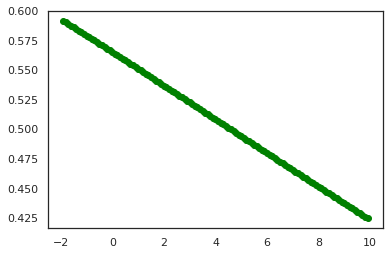

In [0]:
# Plotting sigmoid function 
import numpy as np
from matplotlib import pyplot as plt
def model(clf1,X_train):
    return 1/(1 + np.exp(-(clf1.intercept_+clf1.coef_*X_train)))
for i in range(1,120,1):
    plt.plot(i/10.0-2,model(clf1,i/10.0-2),'ro',color='green')


**Step 3:** After fitting the model, get the co-efficients

In [0]:
clf1.coef_    #Get the coefficients, beta

array([[-0.05721843]])

**Step 4:** Get the intercept

In [0]:
clf1.intercept_  #Get the intercept, c

array([0.26218413])

In [0]:
y_predict = clf1.predict(X_test) 
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.15891900983825896
Mean Squared Error: 0.03442851524649996
Root Mean Squared Error: 0.18554922593883263


**Step 5:** Predict unknown data

In [0]:
y_pred = clf1.predict(X_test) 
y_pred

array([[0.25660146],
       [0.25665499],
       [0.22832927],
       [0.24758116],
       [0.23906441],
       [0.24660578],
       [0.25520579],
       [0.24640951],
       [0.24605068],
       [0.2476446 ],
       [0.25164723],
       [0.24231767],
       [0.25787421],
       [0.23018685],
       [0.25367135],
       [0.2402539 ],
       [0.2524541 ],
       [0.24237912],
       [0.26151009],
       [0.25900225],
       [0.24781906],
       [0.2457771 ],
       [0.25262063],
       [0.20698982],
       [0.25020993],
       [0.24422283],
       [0.25904388],
       [0.26120875],
       [0.2543335 ],
       [0.24209166],
       [0.24602689],
       [0.2462073 ],
       [0.25347905],
       [0.25347905]])

**Step 6:** Visualizing the Training results

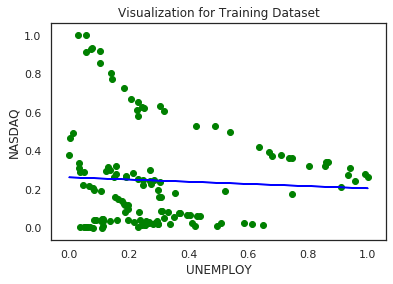

In [0]:
y_pred = clf1.predict(X_test) 

#Visualizing the Training Results 

plt.scatter(X_train, y_train, color= 'green')
plt.plot(X_train, clf1.predict(X_train), color = 'blue')
plt.title ("Visualization for Training Dataset")
plt.xlabel("UNEMPLOY")
plt.ylabel("NASDAQ")
plt.show()

**Step 7:** Visualizing the Test results

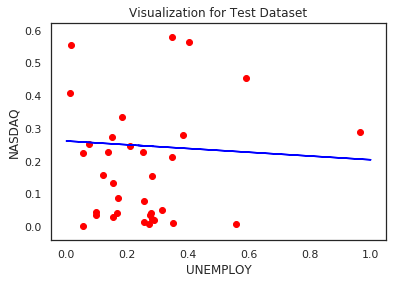

In [0]:
#Visualizing the Test Results 

plt.scatter(X_test, y_test, color= 'red')
plt.plot(X_train, clf1.predict(X_train), color = 'blue')
plt.title ("Visualization for Test Dataset")
plt.xlabel("UNEMPLOY")
plt.ylabel("NASDAQ")
plt.show()

**Prediction of NASDAQ index based on YIELD factor**

**Step 1:** Separate train and test data

In [0]:
X = stock_reg_data[['YIELD']]
y = stock_reg_data[['NASDAQ']]

#Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

#Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**Step 2:** There are three steps to model the data with Linear Regression using sklearn

In [0]:
#Setup the model
clf2 = LinearRegression()

#Use fit function
clf2.fit(X_train, y_train)

#Check the score
sc1 = clf2.score(X_test, y_test)
sc1

-0.13925214029201172

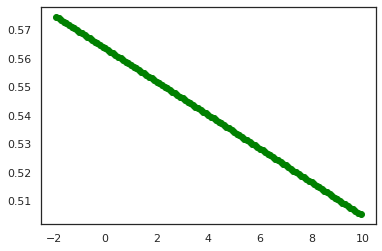

In [0]:
# Plotting sigmoid function 
import numpy as np
from matplotlib import pyplot as plt
def model(clf2,X_train):
    return 1/(1 + np.exp(-(clf2.intercept_+clf2.coef_*X_train)))
for i in range(1,120,1):
    plt.plot(i/10.0-2,model(clf2,i/10.0-2),'ro',color='green')

In [0]:
#Print X_test values
X_test

,YIELD
44,0.434578
47,0.431556
143,0.458821
66,0.441422
147,0.444942
11,0.408960
78,0.442550
35,0.440776
99,0.456343
14,0.368800


**Step 3:** After fitting the model, get the co-efficients

In [0]:
clf2.coef_    #Get the coefficients, beta

array([[-0.02368033]])

**Step 4:** Get the intercept

In [0]:
clf2.intercept_  #Get the intercept, c

array([0.25561053])

**Step 5:** Predict unknown data

In [0]:
y_pred = clf2.predict(X_test) 
y_pred

array([[0.24531957],
       [0.24539115],
       [0.2447455 ],
       [0.24515751],
       [0.24507415],
       [0.24592623],
       [0.24513079],
       [0.24517281],
       [0.24480417],
       [0.24687722],
       [0.24823355],
       [0.24491614],
       [0.24649332],
       [0.24556317],
       [0.24534752],
       [0.24372154],
       [0.24531355],
       [0.24512407],
       [0.24513628],
       [0.24475676],
       [0.24513779],
       [0.2449084 ],
       [0.24493577],
       [0.24496144],
       [0.24531113],
       [0.24074949],
       [0.24597867],
       [0.24556641],
       [0.24697497],
       [0.24548807],
       [0.24384856],
       [0.23889243],
       [0.24495548],
       [0.24490466]])

**Step 6:** Visualizing the Training results

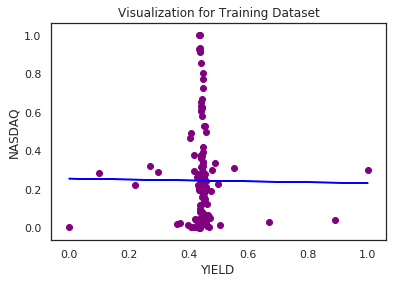

In [0]:
y_pred = clf2.predict(X_test) 

#Visualizing the Training Results 

plt.scatter(X_train, y_train, color= 'purple')
plt.plot(X_train, clf2.predict(X_train), color = 'blue')
plt.title ("Visualization for Training Dataset")
plt.xlabel("YIELD")
plt.ylabel("NASDAQ")
plt.show()

**Step 7:** Visualizing the Test results

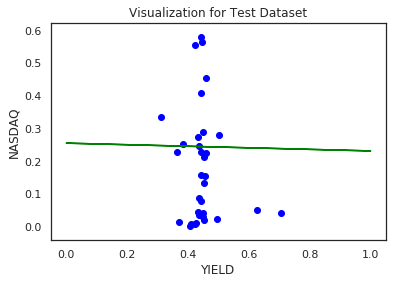

In [0]:
#Visualizing the Test Results 

plt.scatter(X_test, y_test, color= 'blue')
plt.plot(X_train, clf2.predict(X_train), color = 'green')
plt.title ("Visualization for Test Dataset")
plt.xlabel("YIELD")
plt.ylabel("NASDAQ")
plt.show()

# **Metric Calculation for Linear Regression**

In [0]:
y_predict = clf2.predict(X_test) 
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error,r2_score
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))
print("R2 score : %.2f" % r2_score(y_test,y_predict))

Mean Absolute Error: 0.1553081554018451
Mean Squared Error: 0.033499472365475985
Root Mean Squared Error: 0.18302861078387714
R2 score : -0.14


**Observations for Linear Regression**

Question: How does this improve the interpretability of your model? How does it add value to your business case?

After running Linear Regression on the newly added feature 'GDP' from merged dataset, the accuracy of the model is improved which is 0.78 and also the mean squared error is low - 0.008. It is clearly interpreted from the model that whenever GDP goes down, NASDAQ index also goes down which indicates the probability of upcoming recession. This adds value to our business case as we can predict clearly when the recession will occur from the GDP and NASDAQ growth trend.


# **Logistic Regression**

**Step1:** Extract YIELD and RECESSION columns from the dataframe.

In [0]:
 recession_data = data_records[['YIELD','RECESSION']]
# recession_data = pd.read_csv("/content/drive/My Drive/DataSets/quarterly-nasdaq-gdp-unemp-ind-yield.csv", sep=',', usecols=fields)
recession_data.head()

,YIELD,RECESSION
0,0.436097,0
1,0.436757,0
2,0.435232,0
3,0.431336,0
4,0.412620,0


**Step 2:** Importing required libraries for Logistic Regression implementation

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

**Step 3:** Plot the graph to see data distribution

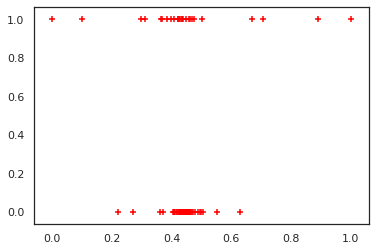

In [0]:
plt.scatter(recession_data.YIELD,recession_data.RECESSION,marker='+',color='red')

**Step 4:** Print the shape of dataset

In [0]:
recession_data.shape

(167, 2)

**Step 5:** Split 80% of the data to the training set and 20% of the data to the test set

In [0]:
X_train, X_test, y_train, y_test = train_test_split(recession_data[['YIELD']], recession_data.RECESSION, test_size=0.2, random_state=0)

In [0]:
X_test

,YIELD
150,0.442591
56,0.468841
123,0.502062
60,0.451502
100,0.449355
51,0.889992
7,0.000000
5,0.406745
86,0.552038
135,0.446633


In [0]:
X_train

,YIELD
61,0.448359
44,0.434578
24,0.451794
63,0.441937
89,0.424154
...,...
9,0.461548
103,0.451615
67,0.441968
117,0.479564


**Step 6:** Train the Logistic Regression model

In [0]:
#Create object of LogisticRegression class
lgr = LogisticRegression()
lgr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

**Step 7:** Calculate predicted values 

In [0]:
y_pred = lgr.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# **Metric Calculation for Logistic Regression**

**Calculate accuracy score of the model**

In [0]:
print(accuracy_score(y_test,y_pred))

0.8235294117647058


In [0]:
y_predict = lgr.predict(X_test) 
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error,r2_score
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))
print("R2 score : %.2f" % r2_score(y_test,y_predict))

Mean Absolute Error: 0.17647058823529413
Mean Squared Error: 0.17647058823529413
Root Mean Squared Error: 0.42008402520840293
R2 score : -0.21


**Print the Confusion matrix**

In [0]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n')
print(confusion)

Confusion Matrix:

[[28  0]
 [ 6  0]]


**Plot the Confusion Matrix**

<Figure size 432x288 with 0 Axes>

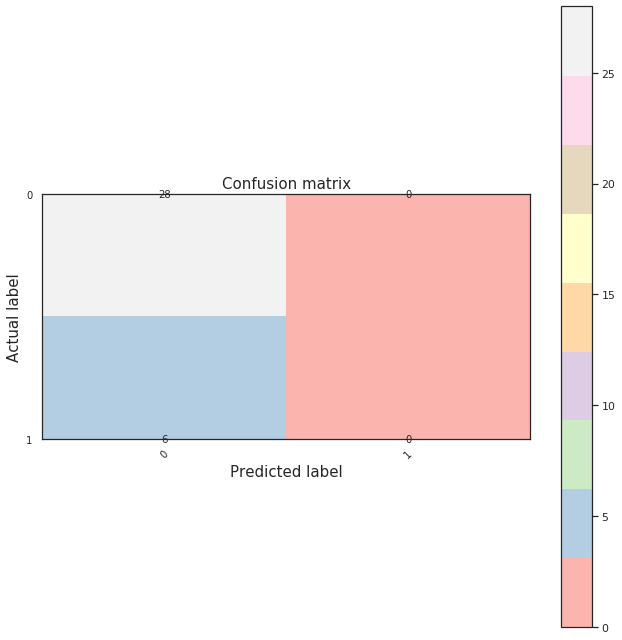

In [0]:
plt.figure()
plot_confusion_matrix(confusion);
plt.show();

**Confusion Matrix Interpretation:**

Total number of True Positives are: 28

Total number of False Positives are: 0

Total number of False Nagatives are : 6

Total number of False Positives are: 0

In [0]:
cm_normalized = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

**Plot the Heat Map**

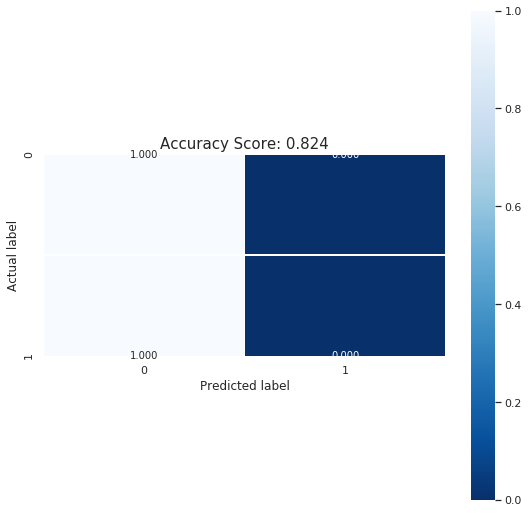

In [0]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(accuracy_score(y_test,y_pred)) 
plt.title(all_sample_title, size = 15);

**Observations for Logistic Regression**

* For a unit decrease in “YIELD”, there is an increase of 1.02 units in the value of RECESSION factor. Similarly, a unit decrease in “GDP“ results in an increase of 1.49 units in the value of RECESSION factor. We can see that the rest of the features have very little impact on the probability of upcoming RECESSION. Thus, we are choosing YIELD factor for Logistic Regression implementation

* Question: What you are trying to learn from the classification?

* Answer: The inverted YIELD curve i.e; The yield on long term investment (10 year) is lower than the yield on short term investment (2 year) depicts a classical signal of a looming recession. Yield curve inversions typically precede recessions. We are trying to predict the binary classification of RECESSION factor. In such cases, the 'RECESSION' factor will fall under the classification of binary value '1' (probability of recession)


**Comparision between Linear and Logistic Regression**

In [0]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Metric", "Linear Regression", "Logistic Regression"]

x.add_row(["Accuracy Score ", 0.81, 0.82])
x.add_row(["Mean Absolute Error",0.59, 0.1803])
x.add_row(["Mean Squared Error",0.0033, 0.0619])
x.add_row(["Root Mean Squared Error",0.183, 0.2488])
x.add_row(["Confusion Matrix","[[ 27  0][ 7 0]]", "[[ 28  0][ 6 0]]"])


print(x)


+-------------------------+-------------------+---------------------+
|          Metric         | Linear Regression | Logistic Regression |
+-------------------------+-------------------+---------------------+
|     Accuracy Score      |        0.81       |         0.82        |
|   Mean Absolute Error   |        0.59       |        0.1803       |
|    Mean Squared Error   |       0.0033      |        0.0619       |
| Root Mean Squared Error |       0.183       |        0.2488       |
|     Confusion Matrix    |  [[ 27  0][ 7 0]] |   [[ 28  0][ 6 0]]  |
+-------------------------+-------------------+---------------------+


# **Decision Tree algorithm**

**Split the dataset into features and target variable**

In [0]:
#Drop the column Classification
features = data_records.drop(['DATE', 'RECESSION'],axis='columns')
features

,NASDAQ,UNEMPLOY,YIELD,GDP,INDUSTRY,Clusters,y_kmeans,labels
0,0.000000,0.109383,0.436097,0.718043,0.849316,0,0,0
1,0.000157,0.080972,0.436757,0.678327,0.799668,0,0,0
2,0.002093,0.052942,0.435232,0.777056,0.823389,0,0,0
3,0.003713,0.059144,0.431336,0.741346,0.819877,0,0,0
4,0.002396,0.050066,0.412620,0.810952,0.847382,0,0,0
...,...,...,...,...,...,...,...,...
162,0.933029,0.075982,0.438572,0.933564,0.858685,2,2,2
163,0.999731,0.056164,0.435827,0.927374,0.929488,2,2,2
164,0.914918,0.056025,0.436789,0.842960,0.890610,2,2,2
165,0.931445,0.075324,0.435616,0.864785,0.839447,2,2,2


**Target variable**

In [0]:
target = data_records['RECESSION']
target

0      0
1      0
2      0
3      0
4      0
      ..
162    0
163    0
164    0
165    0
166    0
Name: RECESSION, Length: 167, dtype: int64

**Split the Features and Target variable into Training and Testing sets**

In [0]:
#Import required libraries
from sklearn.model_selection import train_test_split
from IPython.display import Image

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
cols = list(features.columns)
#Split the faetures and target variable in the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)

**Print the shape of training and test data**

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(133, 8)
(133,)
(34, 8)
(34,)


**Train the Decision Tree classifier**

In [0]:
#Create an instance of the model with depth = 5
model = tree.DecisionTreeClassifier(max_depth = 5)

#Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

**Predict the results on test data**

In [0]:
#Predict the probability of upcoming recession
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

# **Metric Calculation for Decision Tree**

**Calculate the Accuracy score**

In [0]:
#Calculate the accuracy
# Accuracy = TP+TN/TP+FP+FN+TN 
print(accuracy_score(y_test,y_pred))

0.7941176470588235


**Other metrics**

In [0]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" % r2_score(y_test,y_pred))

Mean Absolute Error: 0.20588235294117646
Mean Squared Error: 0.20588235294117646
Root Mean Squared Error: 0.45374260648651504
R2 score : -0.26


**Print the Confusion matrix**

In [0]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n')
print(confusion)

pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=[ 'predicted_average', 'predicted_excellent'],
    index=[ 'true_average', 'true_excellent']
)

Confusion Matrix:

[[23  4]
 [ 3  4]]


,predicted_average,predicted_excellent
true_average,23,4
true_excellent,3,4


**Plot confusion matrix**

<Figure size 432x288 with 0 Axes>

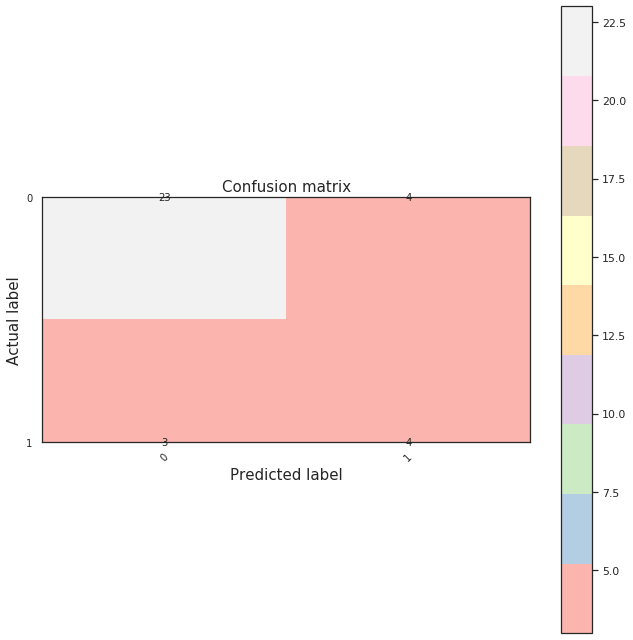

In [0]:
plt.figure()
plot_confusion_matrix(confusion);
plt.show();

**Confusion Matrix Interpretation:**

Total number of True Positives are: 23

Total number of False Positives are: 4

Total number of False Nagatives are : 3

Total number of False Positives are: 4

**Print classification report**

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.50      0.57      0.53         7

    accuracy                           0.79        34
   macro avg       0.69      0.71      0.70        34
weighted avg       0.81      0.79      0.80        34



**Visualize the Decision tree classifier**

In [0]:
#Import the decision tree module
from sklearn import tree
tree_dot_data = tree.export_graphviz(model,
                     out_file = "recessionDCTree.dot",
                     feature_names = features.columns.values,
                     filled=True, rounded=True, special_characters=True)

In [0]:
!dot -Tpng recessionDCTree.dot -o recessionDCTree.png

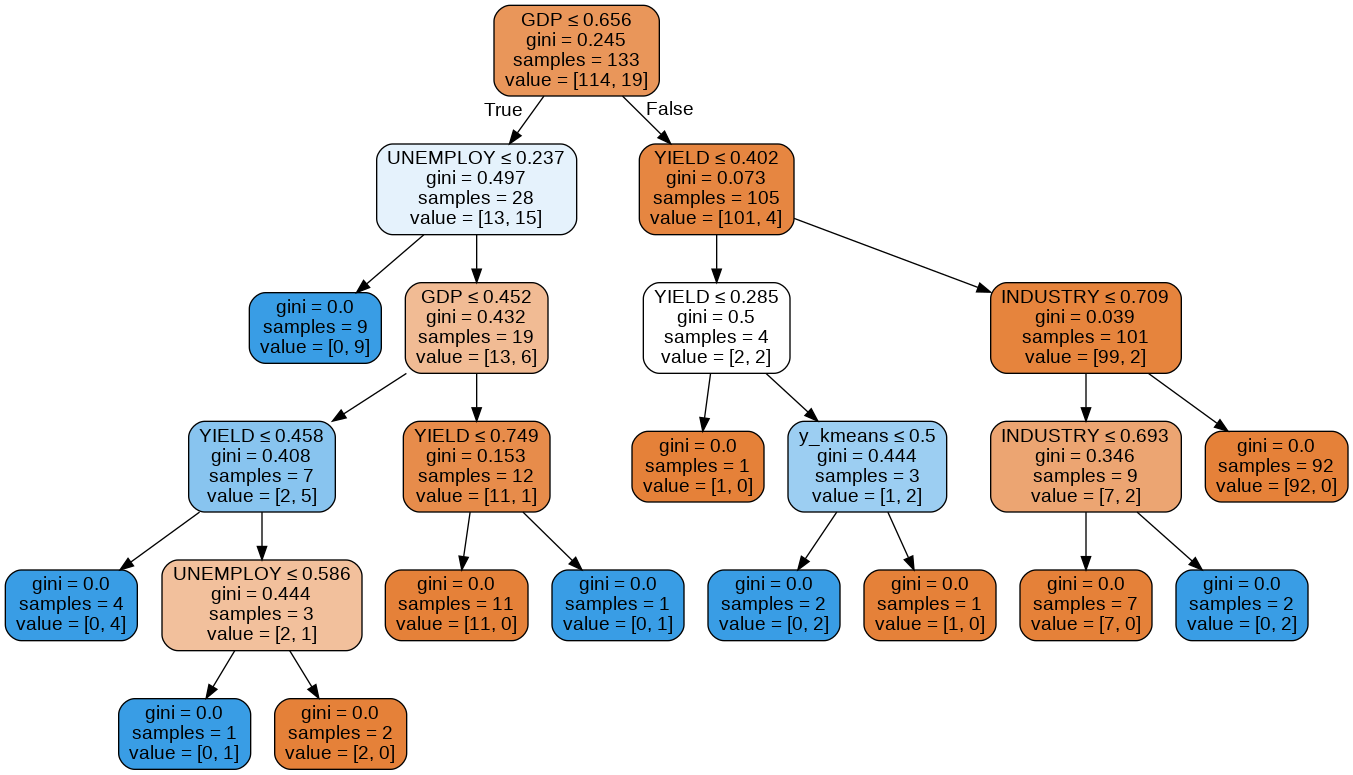

In [0]:
PATH = !pwd
Image(filename = PATH[0] + "/recessionDCTree.png")

**Observations**

* The feature **GDP** has the highest information gain, so selected as a root node

* Gini score for attribute **"GDP"** is **0.245**

* As depicted by the xgboost algorithm, the most important feature is **GDP**

* Accuracy score for Decision Tree Classifier is 76.47%


* We are getting Classification report as below:
precision recall f1-score support

       0       0.85      0.85      0.85        27
 
       1       0.43      0.43      0.43         7
 
accuracy                           0.76        34
macro avg 0.64 0.64 0.64 34

weighted avg 0.76 0.76 0.76 34

* Visualization of Decision Tree Classifier - The 'GDP' factor with highest information gain is the root node (best splitting criteria) for all the other attributes in dataset
* Visualization of Random Forest - The 'INDUSTRY' factor with highest information gain is the root node (best splitting criteria) for all the other attributes in dataset
* Accuracy score for model is 79.11%






# **Random Forest algorithm**

**Train the Random Forest classifier**

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=8,random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# **Performance evaluation for Random Forest**

**Calculate Accuracy**

In [0]:
print(accuracy_score(y_test,y_pred))

0.8235294117647058


**Calculate other metrics**

In [0]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" % r2_score(y_test,y_pred))

Mean Absolute Error: 0.17647058823529413
Mean Squared Error: 0.17647058823529413
Root Mean Squared Error: 0.42008402520840293
R2 score : -0.08


**Print the Confusion matrix**

In [0]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n')
print(confusion)

pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=[ 'predicted_average', 'predicted_excellent'],
    index=[ 'true_average', 'true_excellent']
)

Confusion Matrix:

[[25  2]
 [ 4  3]]


,predicted_average,predicted_excellent
true_average,25,2
true_excellent,4,3


**Plot confusion matrix**

<Figure size 432x288 with 0 Axes>

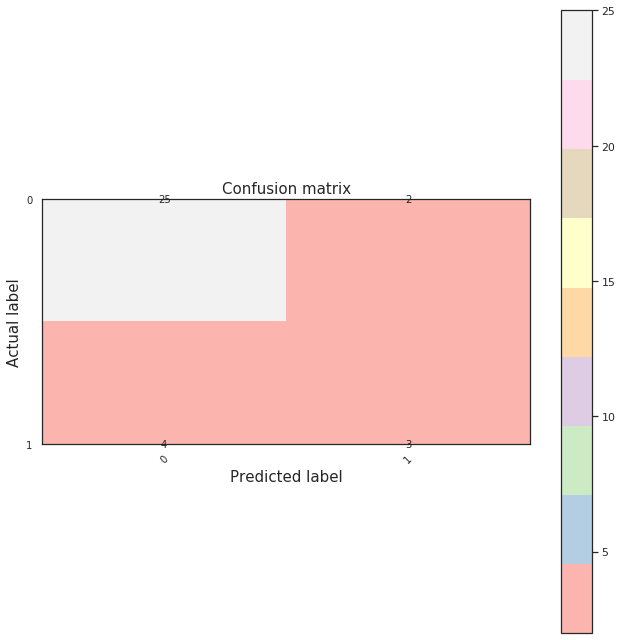

In [0]:
plt.figure()
plot_confusion_matrix(confusion);
plt.show();

**Confusion Matrix Interpretation:**

Total number of True Positives are: 25

Total number of False Positives are: 2

Total number of False Nagatives are : 4

Total number of False Positives are: 3

**Print Classification report**

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        27
           1       0.60      0.43      0.50         7

    accuracy                           0.82        34
   macro avg       0.73      0.68      0.70        34
weighted avg       0.81      0.82      0.81        34



**Visualize the Random Forest classifier**

In [0]:
def gettreeImg(clf,columns):
    dot_data = tree.export_graphviz(clf,
                                    feature_names=columns,
                                    out_file=None,
                                    filled=True,
                                    rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    colors = ('turquoise', 'orange')
    edges = collections.defaultdict(list)

    for edge in graph.get_edge_list():
        edges[edge.get_source()].append(int(edge.get_destination()))

    for edge in edges:
        edges[edge].sort()    
        for i in range(2):
            dest = graph.get_node(str(edges[edge][i]))[0]
            dest.set_fillcolor(colors[i])
    return graph

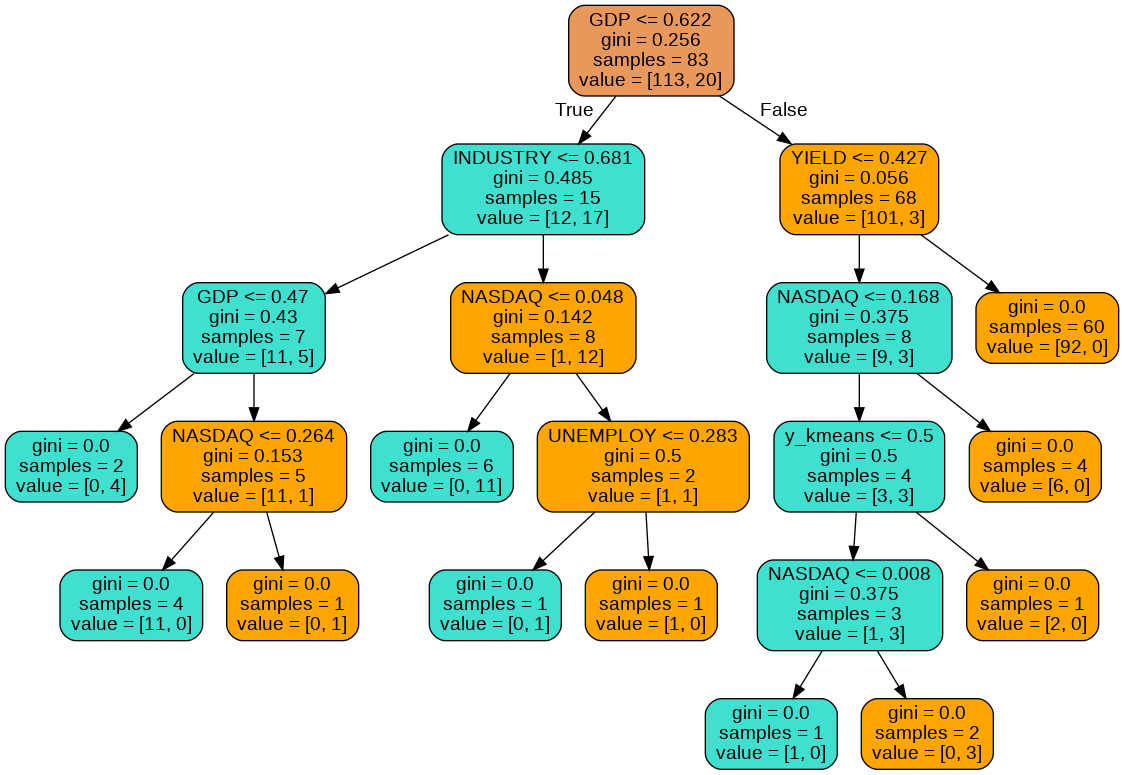

In [0]:
from IPython.display import Image
import pydotplus
import collections
Image(gettreeImg(clf.estimators_[5],cols).create_png())

**Observations**

* The feature **GDP** has the highest information gain, so selected as a root node

* Gini score for the **"GDP"** attribute is **0.256**

* GDP looks like a key factor for the cause of recession. When the value of GDP goes below 2 %, the chance of a decline in market growth increases.

**Random Forest visualization with "INDUSTRY" as the root node**

https://drive.google.com/file/d/1piM8d_NB54hEVmUcuMcMUk7w2UvibTjY/view?usp=sharing

**Observations**

* The feature **INDUSTRY** has the highest information gain, so selected as a root node

* Gini score for the **"INDUSTRY"** attribute is **0.256**

* Industry looks like a key factor for the cause of recession. When the value of Industrial Growth goes below 2 %, the chance of a decline in market growth increases.


**Comparision between Decision Tree and Random Forest**

In [0]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Metric", "Decision Tree", "Random Forest"]

x.add_row(["Accuracy Score ", 0.794, 0.794])
x.add_row(["Mean Absolute Error",0.2058, 0.2058])
x.add_row(["Mean Squared Error",0.2058, 0.2058])
x.add_row(["Root Mean Squared Error",0.4537, 0.4537])
x.add_row(["Confusion Matrix","[[ 23 4][ 3 4]]", "[[ 25  2][ 5 2]]"])


print(x)


+-------------------------+-----------------+------------------+
|          Metric         |  Decision Tree  |  Random Forest   |
+-------------------------+-----------------+------------------+
|     Accuracy Score      |      0.794      |      0.794       |
|   Mean Absolute Error   |      0.2058     |      0.2058      |
|    Mean Squared Error   |      0.2058     |      0.2058      |
| Root Mean Squared Error |      0.4537     |      0.4537      |
|     Confusion Matrix    | [[ 23 4][ 3 4]] | [[ 25  2][ 5 2]] |
+-------------------------+-----------------+------------------+


https://drive.google.com/file/d/1JT_ROyFD1nO7D2Y2ngItaIQm3G-WBxxQ/view?usp=sharing

# **Gaussian Naive Bayes Model**

In [0]:
#Drop the columns DATE and RECESSION
features = data_records.drop(['DATE','RECESSION'],axis='columns')
features

,NASDAQ,UNEMPLOY,YIELD,GDP,INDUSTRY,Clusters,y_kmeans,labels
0,0.000000,0.109383,0.436097,0.718043,0.849316,0,0,0
1,0.000157,0.080972,0.436757,0.678327,0.799668,0,0,0
2,0.002093,0.052942,0.435232,0.777056,0.823389,0,0,0
3,0.003713,0.059144,0.431336,0.741346,0.819877,0,0,0
4,0.002396,0.050066,0.412620,0.810952,0.847382,0,0,0
...,...,...,...,...,...,...,...,...
162,0.933029,0.075982,0.438572,0.933564,0.858685,2,2,2
163,0.999731,0.056164,0.435827,0.927374,0.929488,2,2,2
164,0.914918,0.056025,0.436789,0.842960,0.890610,2,2,2
165,0.931445,0.075324,0.435616,0.864785,0.839447,2,2,2


In [0]:
target = data_records['RECESSION']
target

0      0
1      0
2      0
3      0
4      0
      ..
162    0
163    0
164    0
165    0
166    0
Name: RECESSION, Length: 167, dtype: int64

**Step 2:** Split the Features and Target variable into Training and Testing sets

In [0]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Split the faetures and target variable in the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)

**Step 3:** **Calculate the shape of Training and Testing sets**

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(133, 8)
(133,)
(34, 8)
(34,)


**Implement Naive Bayes Classifier**

In [0]:
#Create an instance of Gaussian Classifier 
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

# **Performance Evaluation of Naive Bayes**

**Step 2:** **Predict the probability of upcoming recession on test dataset**

In [0]:
#Predict the probability of upcoming recession on test dataset
y_pred = gnb.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0])

**Other Metrics**

In [0]:
y_predict = gnb.predict(X_test) 
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error,r2_score
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))
print("R2 score : %.2f" % r2_score(y_test,y_predict))

Mean Absolute Error: 0.08823529411764706
Mean Squared Error: 0.08823529411764706
Root Mean Squared Error: 0.2970442628930023
R2 score : 0.46


**Step 3:** **Calculate the number of mislabeled points out of total points**

In [0]:
print("Number of mislabeled points out of a total %d points : %d"       
     % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 34 points : 3


**Step 4:** **Calculate the accuracy score using actual and predicted values**

In [0]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9117647058823529


**Calculate the Classification Report and Confusion Matrix**

**Classification Report**

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        27
           1       0.70      1.00      0.82         7

    accuracy                           0.91        34
   macro avg       0.85      0.94      0.88        34
weighted avg       0.94      0.91      0.92        34



**Confusion Matrix**


In [0]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n')
print(confusion)

Confusion Matrix:

[[24  3]
 [ 0  7]]


**Plot the Confusion Matrix for Naive Bayes**

In [0]:
#Python function to plot the Confusion Matrix
def plot_confusion_matrix(confusion, title='Confusion matrix', cmap='Pastel1'):
    plt.figure(figsize=(9,9))
    plt.imshow(confusion, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 15)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ["0", "1"], rotation=45, size = 10)
    plt.yticks(tick_marks, ["0", "1"], size = 10)
    plt.tight_layout()
    plt.ylabel('Actual label', size = 15)
    plt.xlabel('Predicted label', size = 15)
    width, height = confusion.shape

    for x in np.arange(width):
        for y in np.arange(height):
            plt.annotate(str(confusion[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')

<Figure size 432x288 with 0 Axes>

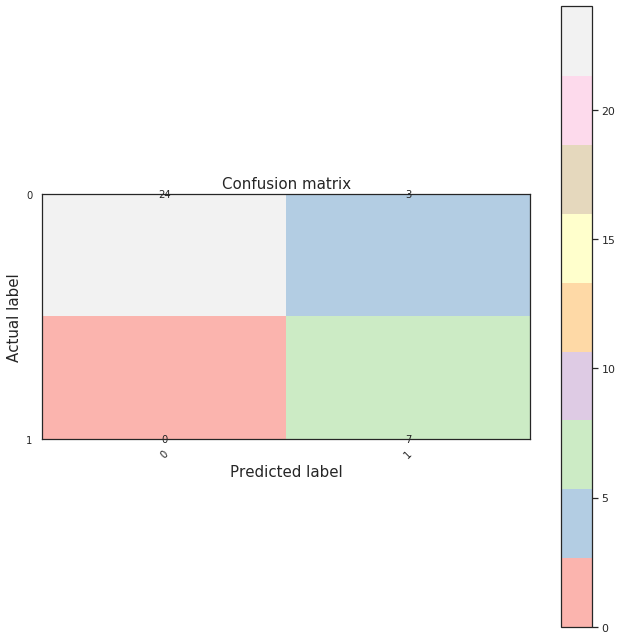

In [0]:
plt.figure()
plot_confusion_matrix(confusion);
plt.show();

**Confusion Matrix Interpretation:**

Total number of True Positives are: 24

Total number of False Positives are: 3

Total number of False Nagatives are : 0

Total number of False Positives are: 7

In [0]:
cm_normalized = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

**Plot the Heat Map for Naive Bayes**

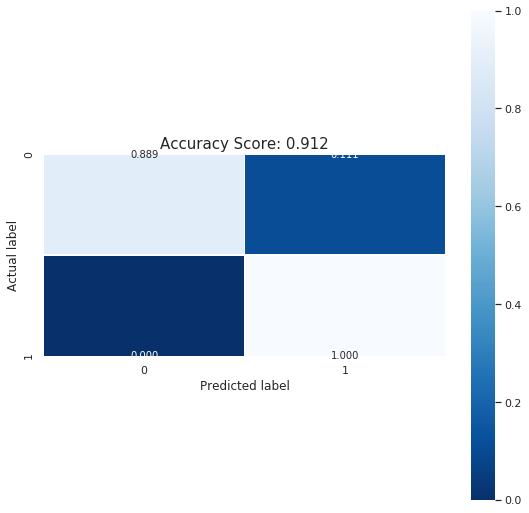

In [0]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(accuracy_score(y_test,y_pred)) 
plt.title(all_sample_title, size = 15);

**Observations**

* Confusion Matrix Interpretation for Naive Bayes:

Total number of True Positives are: 24

Total number of False Positives are: 3

Total number of False Nagatives are : 0

Total number of False Positives are: 7

* Accuracy score: 0.912

* Confusion matrix:
[[24  3]
 [ 0  7]]


# **KNN**

**Python function for generating evaluation reports**

In [0]:
# Function for evaluation reports
def get_eval(clf, X_train, y_train,y_test,y_pred):
    # Cross Validation to test and anticipate overfitting problem
    scores1 = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    scores2 = cross_val_score(clf, X_train, y_train, cv=10, scoring='precision')
    scores3 = cross_val_score(clf, X_train, y_train, cv=10, scoring='roc_auc')
    # The mean score and standard deviation of the score estimate
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std()))
    print("Cross Validation Precision: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std()))
    print("Cross Validation roc_auc: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std()))
    # Create and print confusion matrix
    abclf_cm = confusion_matrix(y_test,y_pred)
    print(abclf_cm)
    return

# Function to get roc curve
def get_roc (y_test,y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #Plot of a ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return

In [0]:
# fit, train and cross validate KNeighborsClassifier with training and test data 
def knnclf(X_train, y_train, X_test, y_test):  
    print("KNeighborsClassifier")
    knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

    # Predict target variables y for test data
    y_pred = knn.predict(X_test)

    # Get Cross Validation and Confusion matrix
    get_eval(knn, X_train, y_train,y_test,y_pred)
    return

knnclf(X_train, y_train, X_test, y_test)

KNeighborsClassifier
Cross Validation Accuracy: 0.90 (+/- 0.06)
Cross Validation Precision: 0.58 (+/- 0.42)
Cross Validation roc_auc: 0.90 (+/- 0.15)
[[26  1]
 [ 6  1]]


**Plot confusion matrix**

Confusion Matrix for KNN:

[[24  0]
 [ 3  7]]


<Figure size 432x288 with 0 Axes>

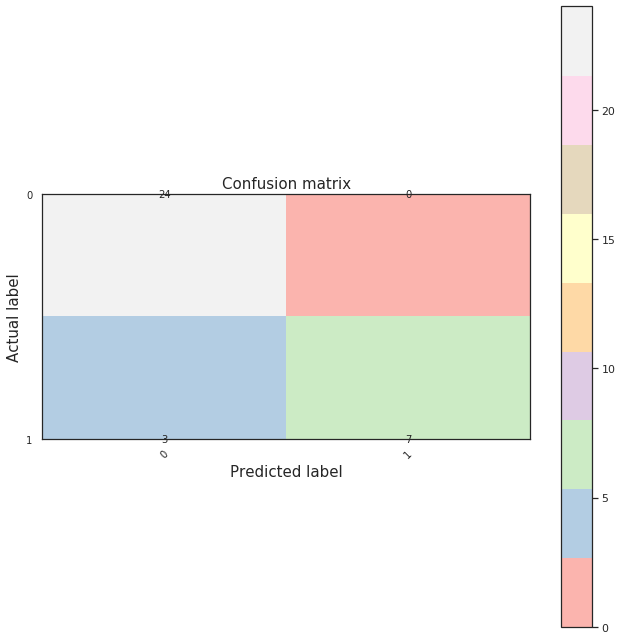

In [0]:
confusion = confusion_matrix(y_pred, y_test)
print('Confusion Matrix for KNN:\n')
print(confusion) 
plt.figure()
plot_confusion_matrix(confusion);
plt.show();

**Confusion Matrix Interpretation:**

Total number of True Positives are: 24

Total number of False Positives are: 0

Total number of False Nagatives are : 3

Total number of False Positives are: 7

**Observations**

* Confusion Matrix Interpretation for KNN:

Total number of True Positives are: 24

Total number of False Positives are: 0

Total number of False Nagatives are : 3

Total number of False Positives are: 7

* Accuracy score: 0.90 (+/- 0.06)

* Confusion matrix:
[[24  0]
 [ 3  7]]

# **Apply Kernel SVM**

## **Polynomial Kernel**

**Import required libraries for SVM**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Divide the dataset into features and target variable**

**features**

In [0]:
#Drop the column Classification
features = data_records.drop(['DATE', 'RECESSION', 'Clusters', 'labels', 'y_kmeans'],axis='columns')
features

,NASDAQ,UNEMPLOY,YIELD,GDP,INDUSTRY
0,0.000000,0.109383,0.436097,0.718043,0.849316
1,0.000157,0.080972,0.436757,0.678327,0.799668
2,0.002093,0.052942,0.435232,0.777056,0.823389
3,0.003713,0.059144,0.431336,0.741346,0.819877
4,0.002396,0.050066,0.412620,0.810952,0.847382
...,...,...,...,...,...
162,0.933029,0.075982,0.438572,0.933564,0.858685
163,0.999731,0.056164,0.435827,0.927374,0.929488
164,0.914918,0.056025,0.436789,0.842960,0.890610
165,0.931445,0.075324,0.435616,0.864785,0.839447


**Target variable**

In [0]:
target = data_records['RECESSION']
target

0      0
1      0
2      0
3      0
4      0
      ..
162    0
163    0
164    0
165    0
166    0
Name: RECESSION, Length: 167, dtype: int64

**Divide the features and target variable into training and testing sets**

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 1)

**Train the algorithm**

In [0]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

**Make predictions on test data**

In [0]:
y_pred = svclassifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**Performance evaluation for SVM**

**Calculate accuracy**

In [0]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7941176470588235


**Other metrics**

In [0]:
y_pred = svclassifier.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error,r2_score
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" % r2_score(y_test,y_pred))

Mean Absolute Error: 0.20588235294117646
Mean Squared Error: 0.20588235294117646
Root Mean Squared Error: 0.45374260648651504
R2 score : -0.26


**Print Confusion matrix**

In [0]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n')
print(confusion)

Confusion Matrix:

[[27  0]
 [ 7  0]]


**Plot Confusion matrix**

In [0]:
#Python function to plot the Confusion Matrix
def plot_confusion_matrix(confusion, title='Confusion matrix', cmap='Pastel1'):
    plt.figure(figsize=(9,9))
    plt.imshow(confusion, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 15)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ["0", "1"], rotation=45, size = 10)
    plt.yticks(tick_marks, ["0", "1"], size = 10)
    plt.tight_layout()
    plt.ylabel('Actual label', size = 15)
    plt.xlabel('Predicted label', size = 15)
    width, height = confusion.shape

    for x in np.arange(width):
        for y in np.arange(height):
            plt.annotate(str(confusion[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')

<Figure size 432x288 with 0 Axes>

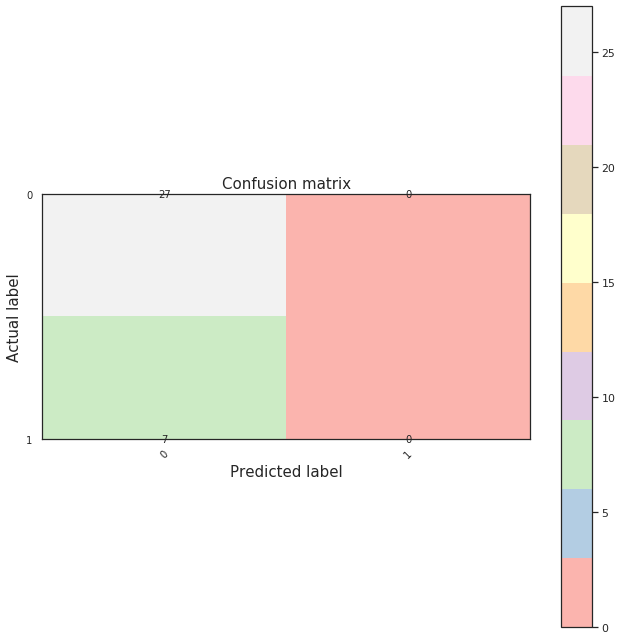

In [0]:
plt.figure()
plot_confusion_matrix(confusion);
plt.show();

**Confusion Matrix Interpretation:**

Total number of True Positives are: 27

Total number of False Positives are: 0

Total number of False Nagatives are : 7

Total number of False Positives are: 0

**Print Classification report**

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.89        27
           1       0.00      0.00      0.00         7

    accuracy                           0.79        34
   macro avg       0.40      0.50      0.44        34
weighted avg       0.63      0.79      0.70        34



In [0]:
cm_normalized = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

**Plot the Heat Map for SVM**

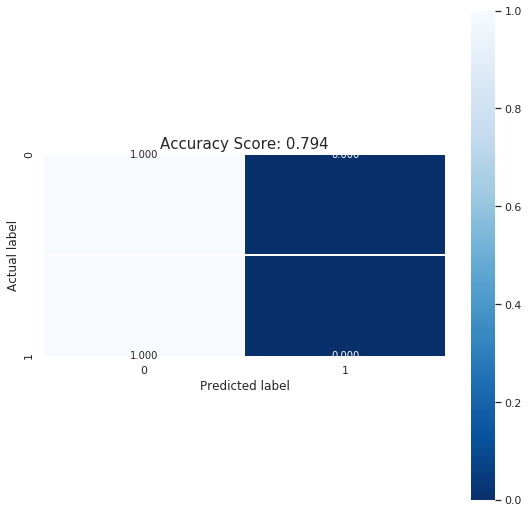

In [0]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(accuracy_score(y_test,y_pred)) 
plt.title(all_sample_title, size = 15);

**Observations**

* Confusion Matrix Interpretation for SVM:

Total number of True Positives are: 27

Total number of False Positives are: 0

Total number of False Nagatives are : 7

Total number of False Positives are: 0

* Accuracy score: 0.794

* Confusion matrix:
[[27  0]
 [ 7  0]]

# **Principal Component Analysis**

**Apply Principal Component Analysis for Dimensionality Reduction**

In [0]:
#Print the columns in dataset

data_records.columns

Index(['DATE', 'NASDAQ', 'UNEMPLOY', 'YIELD', 'GDP', 'INDUSTRY', 'RECESSION',
       'labels', 'Clusters', 'y_kmeans'],
      dtype='object')

**Divide the dataset into features and target variable**

In [0]:
features = ['NASDAQ', 'UNEMPLOY', 'YIELD', 'GDP',
       'INDUSTRY']
x = data_records.loc[:,features].values
y = data_records.loc[:,['RECESSION']].values #target variable

**Standardize the data**

In [0]:
#Step 1: Standardize the data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(x) 

**Print first few records of the standardized dataset**

In [0]:
pd.DataFrame(data = X, columns = features).head()

,NASDAQ,UNEMPLOY,YIELD,GDP,INDUSTRY
0,-0.968722,-0.766384,-0.094835,-0.016164,0.555296
1,-0.968067,-0.887737,-0.086967,-0.253440,0.217232
2,-0.959981,-1.007461,-0.105146,0.336388,0.378753
3,-0.953213,-0.980971,-0.151602,0.123050,0.354842
4,-0.958713,-1.019745,-0.374771,0.538893,0.542131


**PCA Projection**

In [0]:
# Setp 2 : PCA Projection to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform (x)
principalDf = pd.DataFrame(data = principalComponents, columns=['PC1','PC2']) #PC = Principal component 
principalDf.head()

,PC1,PC2
0,-0.019860,-0.300667
1,-0.000482,-0.310105
2,-0.076150,-0.329788
3,-0.054241,-0.323733
4,-0.103897,-0.335095


**Concatenate DataFrame with the label 'RECESSION'**

In [0]:
finalDf = pd.concat([principalDf,data_records[['RECESSION']]], axis = 1)
finalDf.head()

,PC1,PC2,RECESSION
0,-0.019860,-0.300667,0
1,-0.000482,-0.310105,0
2,-0.076150,-0.329788,0
3,-0.054241,-0.323733,0
4,-0.103897,-0.335095,0


**Visualize the Principal Component Analysis**

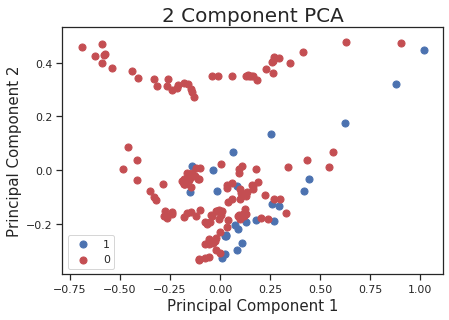

In [0]:
# Step 3 - Visualize the Data in 2D.
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2,2,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = [1,0]

colors = ['b','r']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['RECESSION'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
plt.show()

**Observation from visualizations**

* The dimensionality of attributes in the dataset is reduced to two components using **Principal Component Analysis**

* The two PCA components can be visualized with 2D projection graph

**Calculate the variance ratio**

In [0]:
pca.explained_variance_ratio_

array([0.44087104, 0.32817915])

**Accuracy comparision for all the algorithms**

https://drive.google.com/file/d/10x1HLmjvbhLLlMDH9AcvSrR9Rb7SX17u/view?usp=sharing

# **Step 8. Metrics and Evaluation**


1. **F1, R2, RMSE**


2. **Precision, Recall, Accuracy**


3. **Confusion Matrix**



**Accuracy**

In [0]:
#Calculate the accuracy
# Accuracy = TP+TN/TP+FP+FN+TN 
print(accuracy_score(y_test,y_pred))

**Confusion Matrix**

In [0]:
confusion = confusion_matrix(y_pred, y_test)
print('Confusion Matrix for KNN:\n')
print(confusion) 
plt.figure()
plot_confusion_matrix(confusion);
plt.show();

**Metrics**

In [0]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
print(accuracy_score(y_test,y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

**Precision, Recall, ROC Curve**

In [0]:
# Function for evaluation reports
def get_eval(clf, X_train, y_train,y_test,y_pred):
    # Cross Validation to test and anticipate overfitting problem
    scores1 = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    scores2 = cross_val_score(clf, X_train, y_train, cv=10, scoring='precision')
    scores3 = cross_val_score(clf, X_train, y_train, cv=10, scoring='roc_auc')
    # The mean score and standard deviation of the score estimate
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std()))
    print("Cross Validation Precision: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std()))
    print("Cross Validation roc_auc: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std()))
    # Create and print confusion matrix
    abclf_cm = confusion_matrix(y_test,y_pred)
    print(abclf_cm)
    return

# Function to get roc curve
def get_roc (y_test,y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #Plot of a ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return

**Conclusion**

* In this project, we have demonstrated a machine learning approach to predict stock market recession using various clustering, classification and regression algorithms. Result shows how we can use historical data to predict stock market movement with reasonable accuracy

* After applying the classifiers, the result showed that GDP and Industrial Production Index had a high impact on the market growth. Whenever these two factors went below a 3% value change compared to previous years, the market would start to decline

* We calculated the accuracy score for different algorithms implemented on the Recession dataset. The accuracy score comparision is shown in the below table:

https://drive.google.com/file/d/10x1HLmjvbhLLlMDH9AcvSrR9Rb7SX17u/view?usp=sharing

* From the above table, we can see that **Accuracy score** for the Naive Bayes algorithm is highest amongst all the algorithms

* By feeding our model with data for current GDP and Industrial trends, the model would be able to indicate the occurrence of  recession by analyzing the previous trend




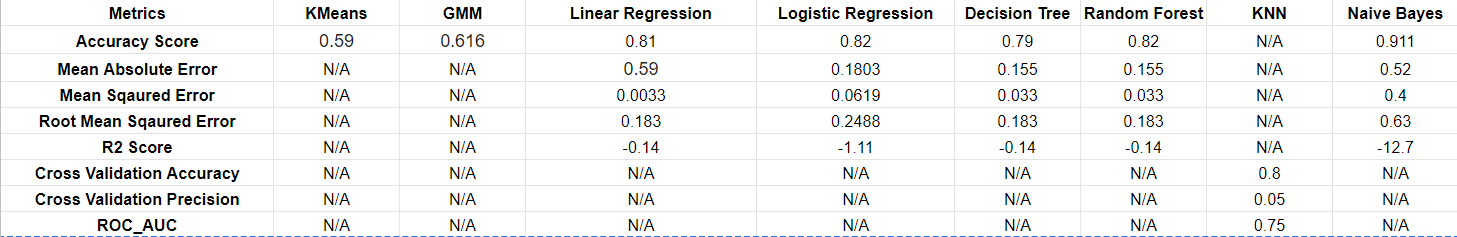